#Please install these libraries or update them for use at ease.

```
pip install statsmodels
pip install scikit-learn
pip install seaborn
pip install numpy
pip install pandas
pip install tensorflow
pip install tqdm
!pip install statsmodels
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install tqdm
```



#Data Processing

In [36]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import pandas as pd
import statsmodels.api as sm
import math
import warnings
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
import concurrent.futures
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [37]:
#Constants
COUNTRIES =['Japan', 'France', 'Usa', 'Colombia', 'Sweden',"World"]
FILE_NAME= 'population_data_bis1.csv'

In [38]:
def process_data(path, countries=[]):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    print(df.describe())
    df=df.set_index('Date')


    return df,np.log(df)
df,data = process_data(FILE_NAME,COUNTRIES)
data.columns
data.index.dtype

            Japan      France         Usa    Colombia      Sweden        World
count  272.000000  272.000000  272.000000  272.000000  272.000000   272.000000
mean   127.146508   63.163563  312.920162   44.142054    9.607097  7188.294299
std      0.905116    1.937443   15.657188    3.660393    0.542050   553.251380
min    124.477000   59.267000  283.960000   38.378407    8.884193  6237.511475
25%    126.873500   61.646500  299.383500   41.096611    9.102150  6702.949400
50%    127.399500   63.444500  314.272000   43.682850    9.503901  7194.906219
75%    127.793500   64.835750  327.878250   46.757171   10.122262  7685.472556
max    128.099000   65.946000  335.501000   51.093190   10.554692  8092.631929


dtype('<M8[ns]')

In [39]:
data

Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2001-01-01  4.843494  4.082053  5.648833  3.647495  2.184274  8.738337
2001-02-01  4.844581  4.082559  5.649559  3.648568  2.184415  8.739422
2001-03-01  4.844030  4.083065  5.650311  3.649536  2.184605  8.740507
2001-04-01  4.844596  4.083621  5.651092  3.650608  2.184809  8.741592
2001-05-01  4.844274  4.084193  5.651907  3.651645  2.185112  8.742677
...              ...       ...       ...       ...       ...       ...
2023-04-01  4.824739  4.187638  5.813772  3.930211  2.354990  8.995777
2023-05-01  4.824121  4.187865  5.814169  3.931089  2.355262  8.996510
2023-06-01  4.824466  4.188138  5.814617  3.932001  2.355681  8.997243
2023-07-01  4.824788  4.188472  5.815112  3.932744  2.355968  8.997976
2023-08-01  4.824627  4.188836  5.815625  3.933651  2.356571  8.998709

[272 rows x 6 columns]

In [40]:
data.describe()

Japan      France         Usa    Colombia      Sweden       World
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000
mean     4.845315    4.145255    5.744688    3.784024    2.260931    8.877237
std      0.007153    0.030879    0.050419    0.082279    0.056039    0.077397
min      4.824121    4.082053    5.648833    3.647495    2.184274    8.738337
25%      4.843191    4.121416    5.701725    3.715926    2.208511    8.810303
50%      4.847328    4.150165    5.750259    3.776955    2.251702    8.881128
75%      4.850416    4.171857    5.792642    3.844967    2.314737    8.947087
max      4.852803    4.188836    5.815625    3.933651    2.356571    8.998709

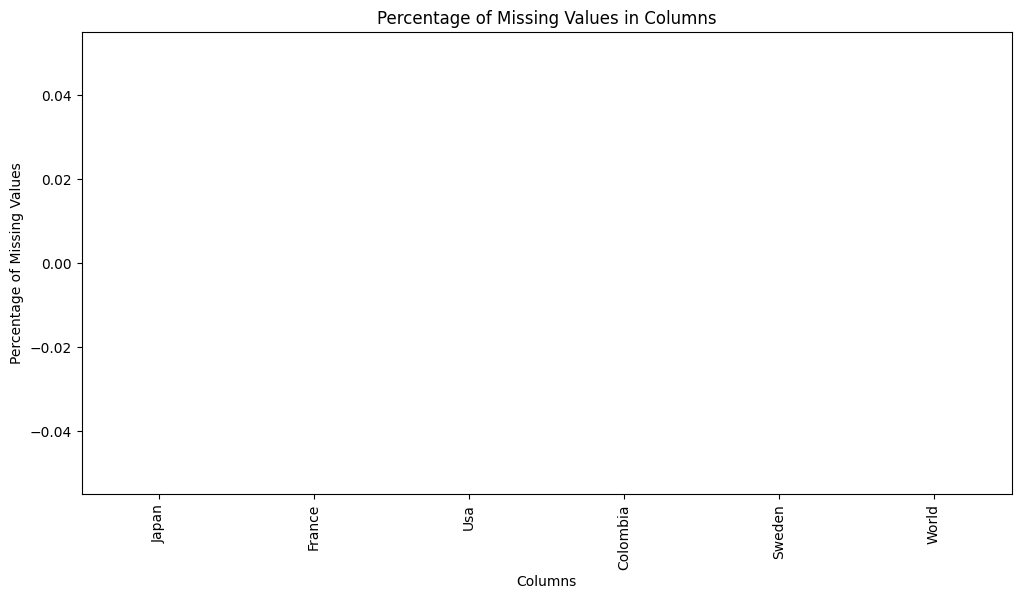

In [41]:
def plot_nan_percentage(data):
    nan_percentage = (data.isnull().sum() / len(data)) * 100
    nan_percentage = nan_percentage[nan_percentage >=0]  # Filter out columns with no missing values

    # Plotting
    plt.figure(figsize=(12, 6))
    nan_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.show()


plot_nan_percentage(data)

Country : Japan, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : France, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Usa, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Colombia, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Sweden, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : World, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00


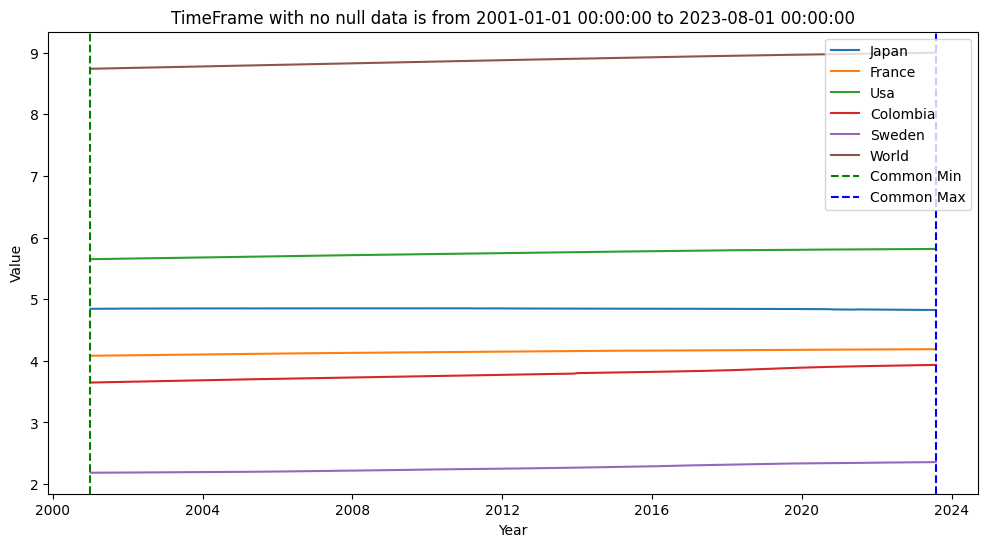

In [42]:
def nan_intime(output):
    missing_data = output.isnull()

    # Find the common time frame (min and max)
    treshold=output.dropna()
    common_min = treshold.index.min()
    common_max = treshold.index.max()

    # Create a line plot with missing data highlighted
    plt.figure(figsize=(12, 6))

    for country in output.columns:
        plt.plot(output.index, output[country], label=country)

    # Highlight missing data in red
    for country in output.columns:
        plt.scatter(output.index[missing_data[country]], output[country][missing_data[country]], c='red', s=10)
        print(f'Country : {country}, From {output[country].dropna().index.min()} to  {output[country].dropna().index.max()}')

    # Add a vertical line for the common time frame
    plt.axvline(common_min, color='green', linestyle='--', label='Common Min')
    plt.axvline(common_max, color='blue', linestyle='--', label='Common Max')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'TimeFrame with no null data is from {common_min} to {common_max}')
    plt.legend()

    plt.show()


# Example usage
nan_intime(data)


Country : Japan, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : France, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Usa, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Colombia, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : Sweden, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00
Country : World, From 2001-01-01 00:00:00 to  2023-08-01 00:00:00


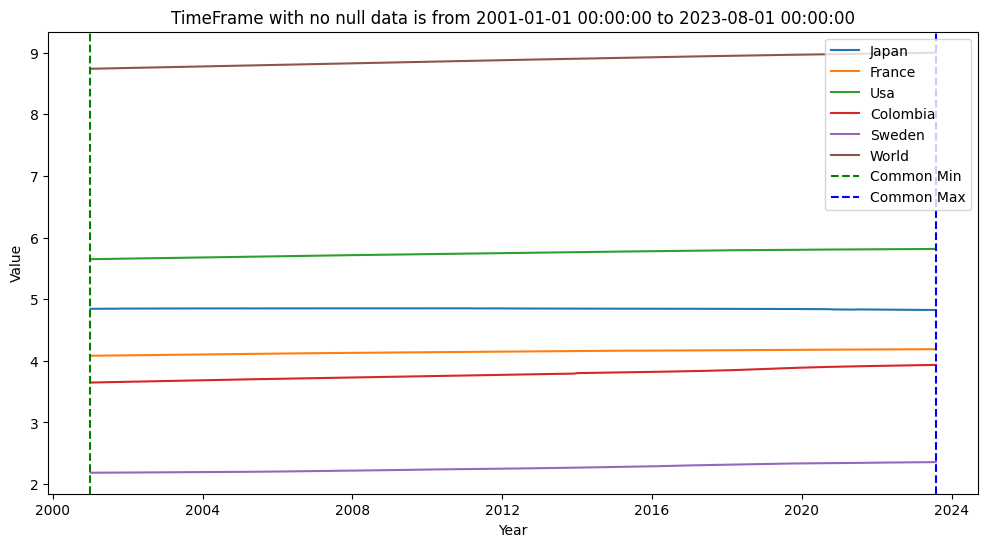

In [43]:
import pandas as pd
import numpy as np

def replace_outliers_with_moving_average(data, window_size, z_score_threshold=3):
    """
    Replaces outliers in a DataFrame with the moving average.

    :param data: A pandas DataFrame with numerical data
    :param window_size: The window size for calculating the moving average
    :param z_score_threshold: The z-score threshold to identify outliers
    :return: DataFrame with outliers replaced by moving averages
    """
    # Create a copy of the data to avoid modifying the original DataFrame
    data_cleaned = data.copy()

    # Iterate through each column
    for column in data.columns:
        # Skip non-numeric columns
        if not np.issubdtype(data[column].dtype, np.number):
            continue

        # Calculate the moving average
        moving_avg = data[column].rolling(window=window_size, min_periods=1).mean()

        # Calculate the z-score for each value
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

        # Identify outliers
        outliers = z_scores > z_score_threshold

        # Replace outliers with moving average
        data_cleaned[column].where(~outliers, moving_avg, inplace=True)

    return data_cleaned
data = replace_outliers_with_moving_average(data,12)
nan_intime(data)


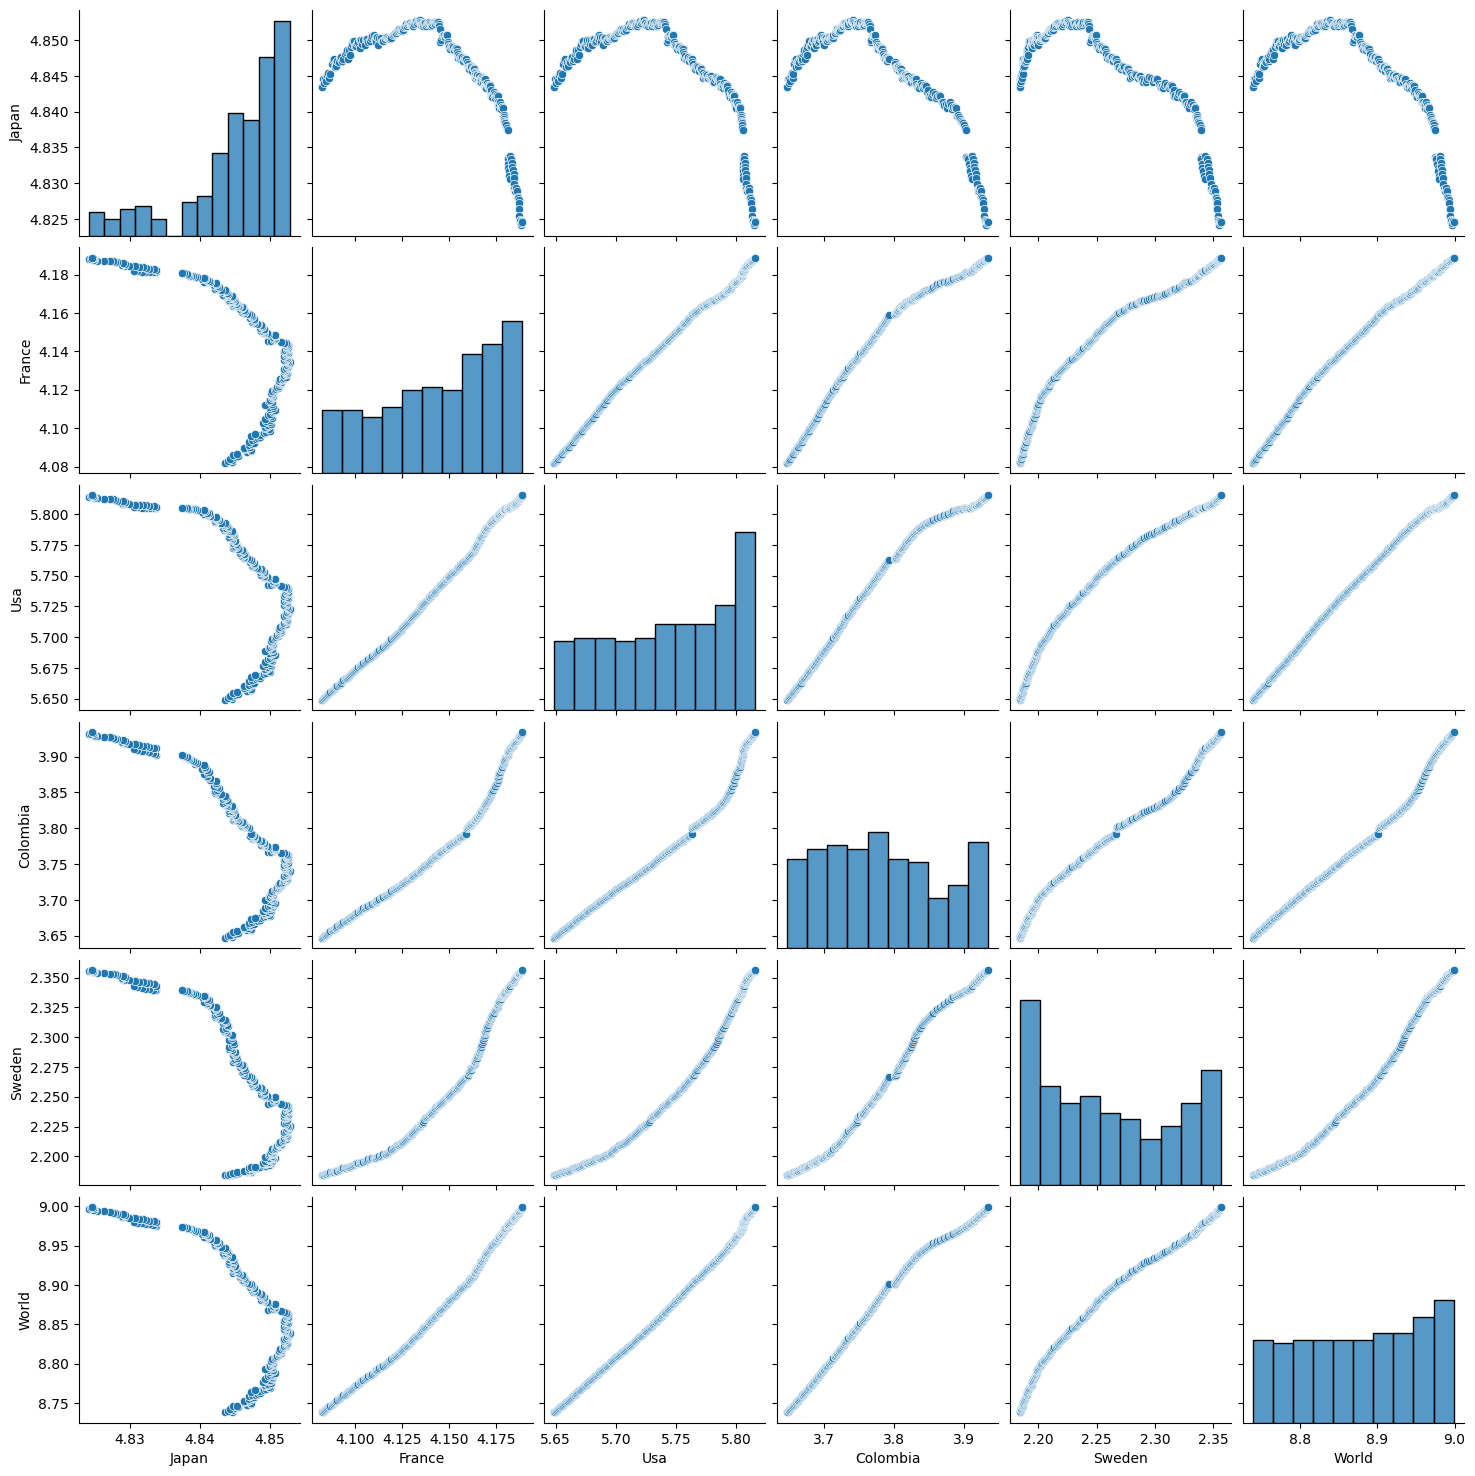

In [44]:
sns.pairplot(data)

# Check the series for stationnarity
Most of the series are not stationnary at the first difference except for the Total World Population, the rest of the country level data is stationnary at the second difference.


In [45]:

def determine_differencing_order_for_all(data):
    stat={}
    for column in data.columns:
        series = data[column].dropna()
        d = 0

        while True:
            # Perform Augmented Dickey-Fuller test for stationarity
            result = adfuller(series)

            print(f"Results for column '{column}' (I({d})):")
            print(f"ADF Statistic: {result[0]}")
            print(f"P-Value: {result[1]}")
            print("Critical Values:")
            for key, value in result[4].items():
                print(f"  {key}: {value}")

            if result[1] <= 0.05:
                print(f"Series '{column}' is stationary at order I({d}) (reject null hypothesis)")
                break
            else:
                print(f"Series '{column}' is non-stationary at order I({d}) (fail to reject null hypothesis)")
                d += 1
                series = series.diff().dropna()  # Differencing the series
            print('\n')
        stat[column]=d

    return(stat)
# Example usage:
# Assuming you have a DataFrame 'data' with columns containing time series data
orders =determine_differencing_order_for_all(data)


Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782015444
P-Value: 0.9982025396450246
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.3073067113569596
P-Value: 0.1696222399183679
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025743889
P-Value: 9.007186613061786e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.3218228480975616
P-Value: 0.013930731409084976
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.5728461399

In [99]:
data.isna().sum()

Japan       0
France      0
Usa         0
Colombia    0
Sweden      0
World       0
dtype: int64

#  Decompose the series and study the seasonaility


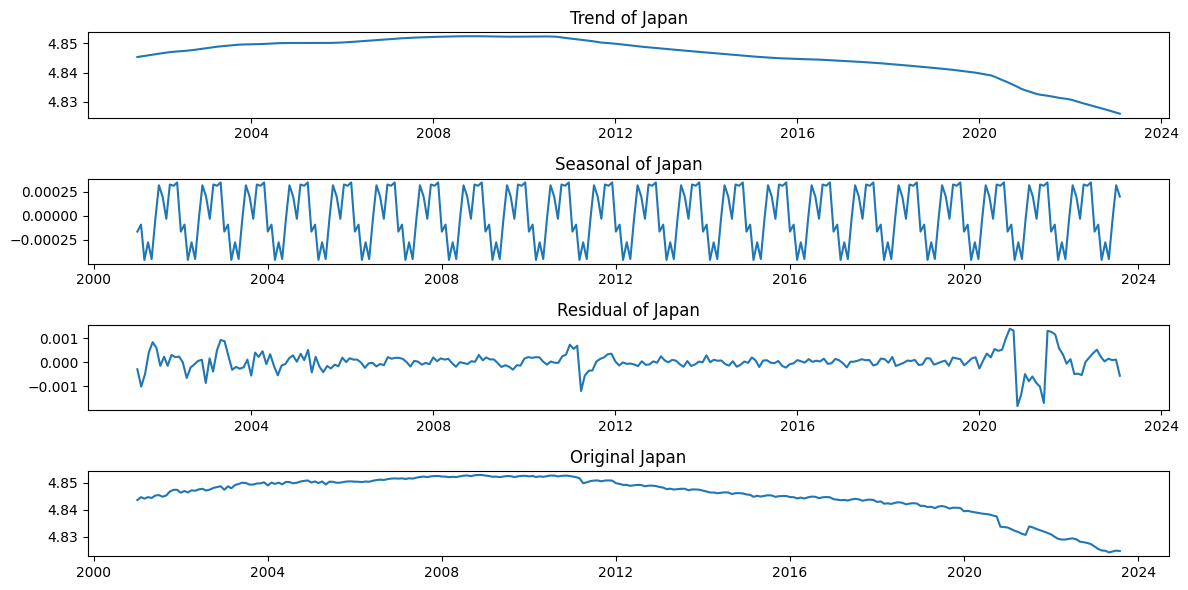

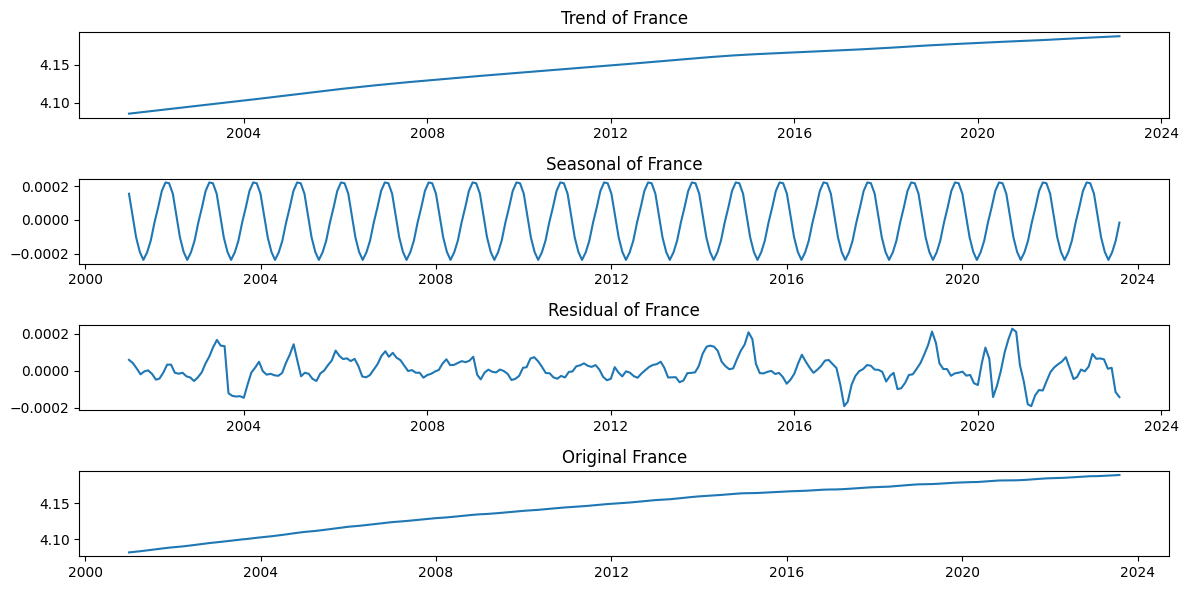

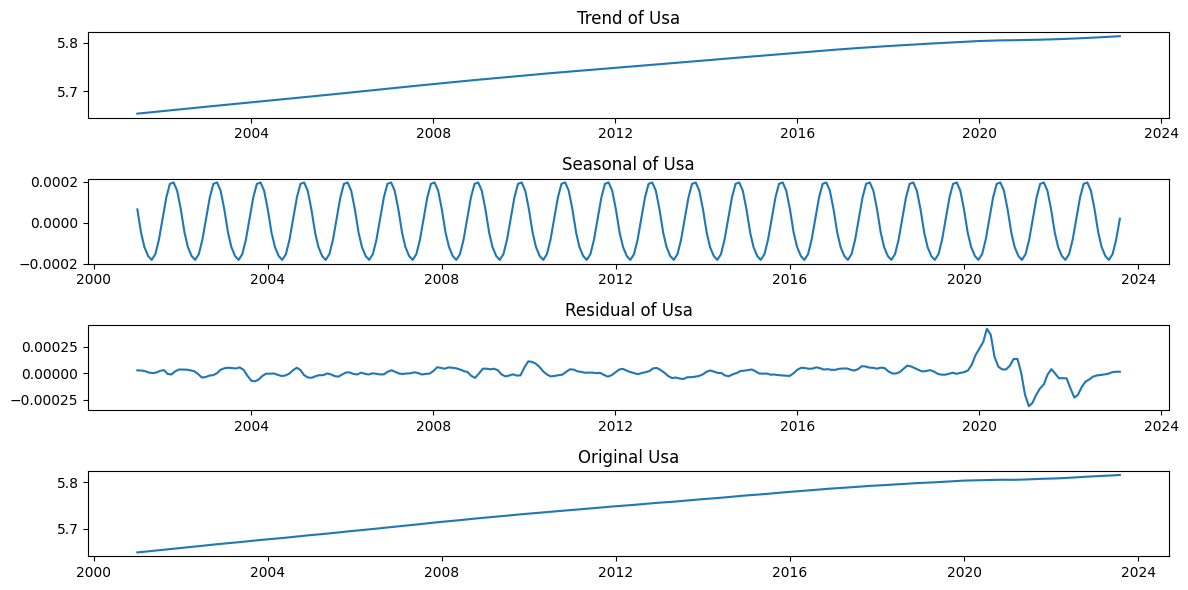

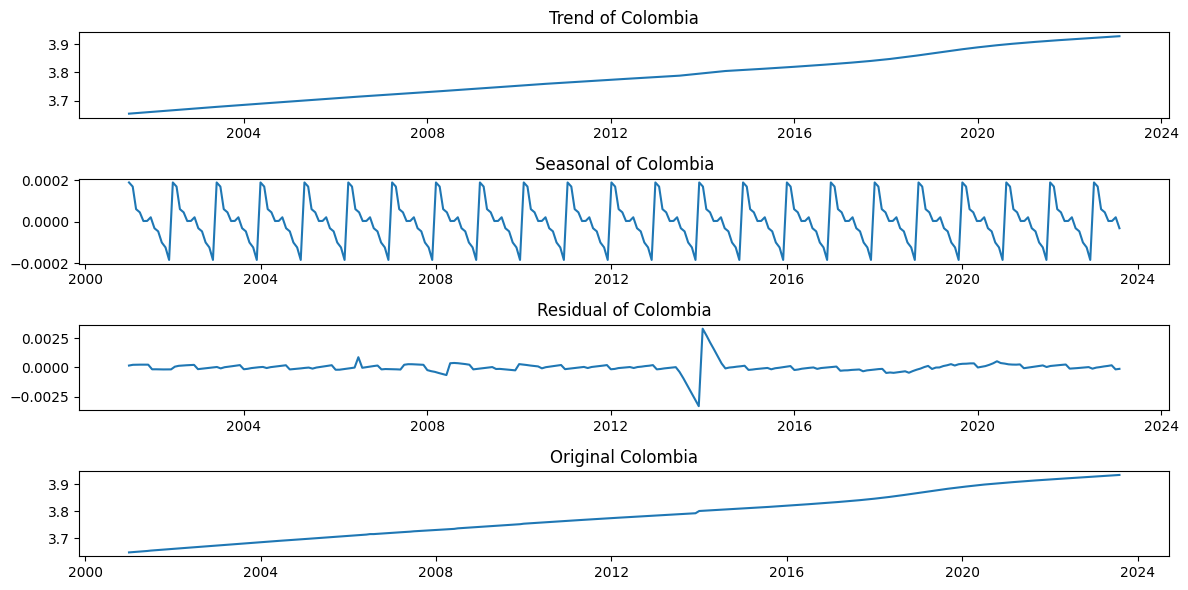

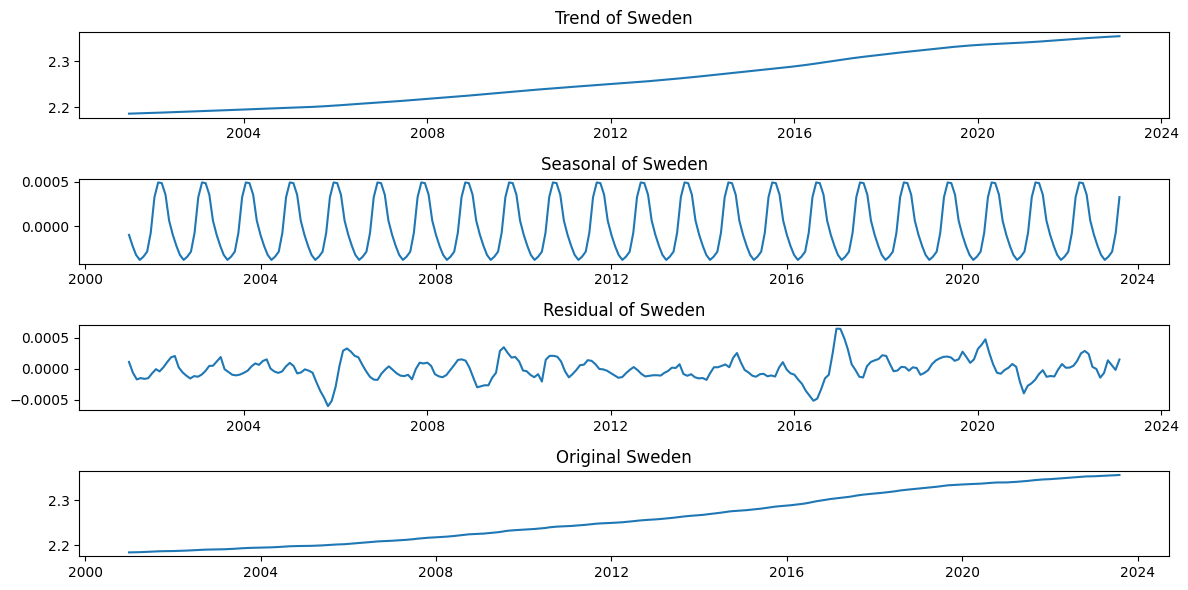

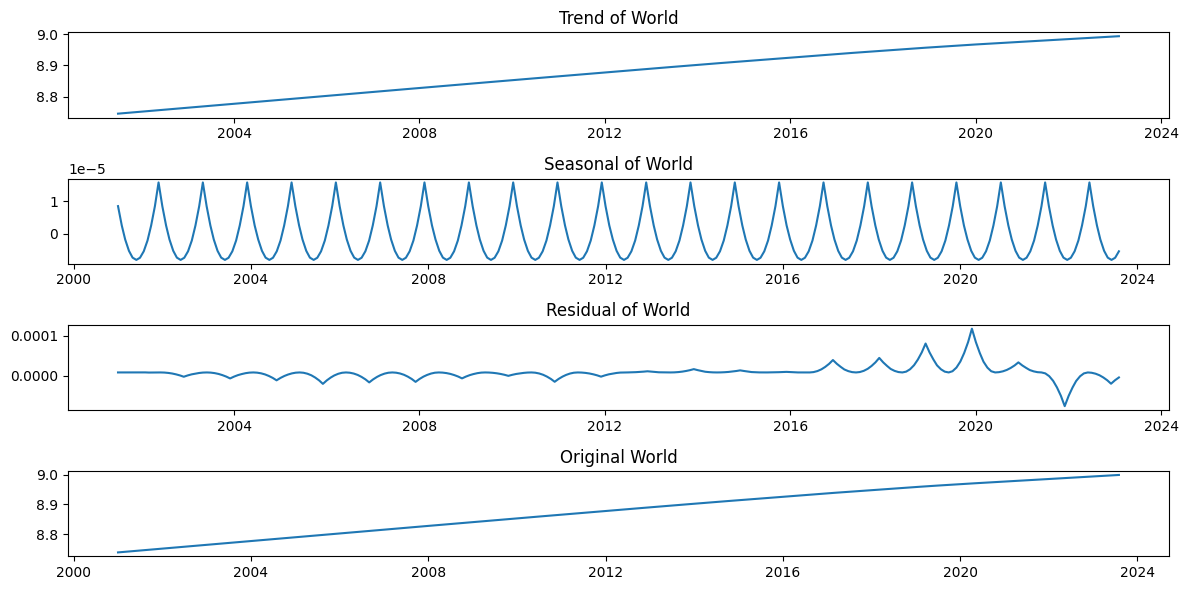

In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def decompose_data(data, freq='M'):
    decomposed_data = {}
    dec_trend = pd.DataFrame()

    for column in data.columns:
        # Ensure the data index is a DatetimeIndex
        if not isinstance(data.index, pd.DatetimeIndex):
            raise ValueError("Data index must be a DatetimeIndex.")

        # Drop NA values and set the frequency
        series = data[column]

        # Decompose the time series
        decomposition = sm.tsa.seasonal_decompose(series, model='additive')
        dec_trend[column] = decomposition.trend

        # Store the decomposition components in a dictionary
        decomposed_data[column] = {
            'trend': decomposition.trend,
            'seasonal': decomposition.seasonal,
            'residual': decomposition.resid
        }

        # Visualize the decomposed components
        plt.figure(figsize=(12, 6))
        plt.subplot(411)
        plt.plot(decomposed_data[column]['trend'])
        plt.title(f'Trend of {column}')
        plt.subplot(412)
        plt.plot(decomposed_data[column]['seasonal'])
        plt.title(f'Seasonal of {column}')
        plt.subplot(413)
        plt.plot(decomposed_data[column]['residual'])
        plt.title(f'Residual of {column}')
        plt.subplot(414)
        plt.plot(data[column])
        plt.title(f'Original {column}')
        plt.tight_layout()
        plt.show()

    return dec_trend

# Example usage
decomposed_data = decompose_data(data, freq='M')  # 'M' for monthly frequency


# Study the Trends and attempt to forecast the covid impact

In [16]:
def find_best_order_single_column(column, series, min_ar,min_ma,max_ar, max_ma, cutoff_date, d):
    best_order = None
    best_aic = float('inf')

    for p in range(min_ar, max_ar + 1):
        for q in range(min_ma, max_ma + 1):
            training_data = series[series.index <= cutoff_date]
            testing_data = series[series.index > cutoff_date]

            model = ARIMA(training_data, order=(p, d, q))
            arima_model = model.fit()
            aic = arima_model.aic

            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)

    return column, best_order

def find_best_orders(data, min_ar,min_ma,max_ar, max_ma, cutoff_date, diff_orders):
    best_orders = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for column in data.columns:
            series = data[column].dropna()
            d = diff_orders.get(column, 0)  # Use the pre-determined 'd' from the 'orders' dictionary
            futures.append(executor.submit(find_best_order_single_column, column, series,min_ar,min_ma, max_ar, max_ma, cutoff_date, d))

        # Use tqdm to display a progress bar
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Finding best orders"):
            column, order = future.result()
            best_orders[column] = order
    return best_orders

def ARIMA_forecast(data, best_orders, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    arima_models = {}

    for column, order in best_orders.items():
        series = data[column]

        p, d, q = order

        # Split the data into training and testing based on the cutoff date
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        # Fit an ARIMA model based on the best order using the training data
        model = ARIMA(training_data, order=order)
        arima_model = model.fit()

        arima_models[column] = arima_model

    return arima_models

In [17]:
decomposed_data=decomposed_data.dropna()
decomposed_data
trend_orders = determine_differencing_order_for_all(decomposed_data)

cutoff_date = pd.to_datetime('2020-03-01')

Results for column 'Japan' (I(0)):
ADF Statistic: 2.382784446727616
P-Value: 0.9990019763247047
Critical Values:
  1%: -3.4577787098622674
  5%: -2.873608704758507
  10%: -2.573201765981991
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -0.3908664727768543
P-Value: 0.9116126165210353
Critical Values:
  1%: -3.458010773719797
  5%: -2.8737103617125186
  10%: -2.5732559963936206
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -6.844902419667716
P-Value: 1.7529121838825367e-09
Critical Values:
  1%: -3.458010773719797
  5%: -2.8737103617125186
  10%: -2.5732559963936206
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.9516117276390856
P-Value: 0.0016861940958712068
Critical Values:
  1%: -3.4578942529658563
  5%: -2.8736593200231484
  10%: -2.57322876

In [18]:
trend_orders

{'Japan': 2, 'France': 0, 'Usa': 3, 'Colombia': 2, 'Sweden': 2, 'World': 3}

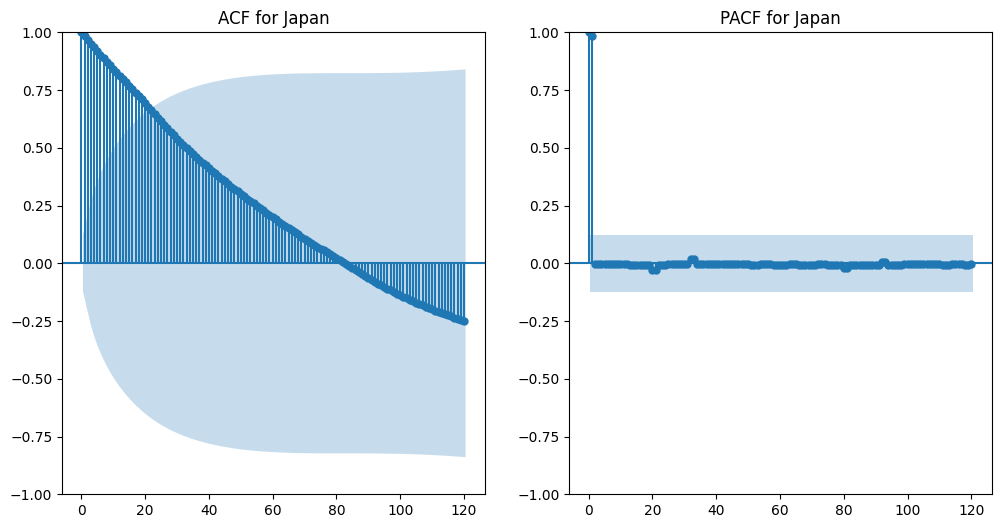

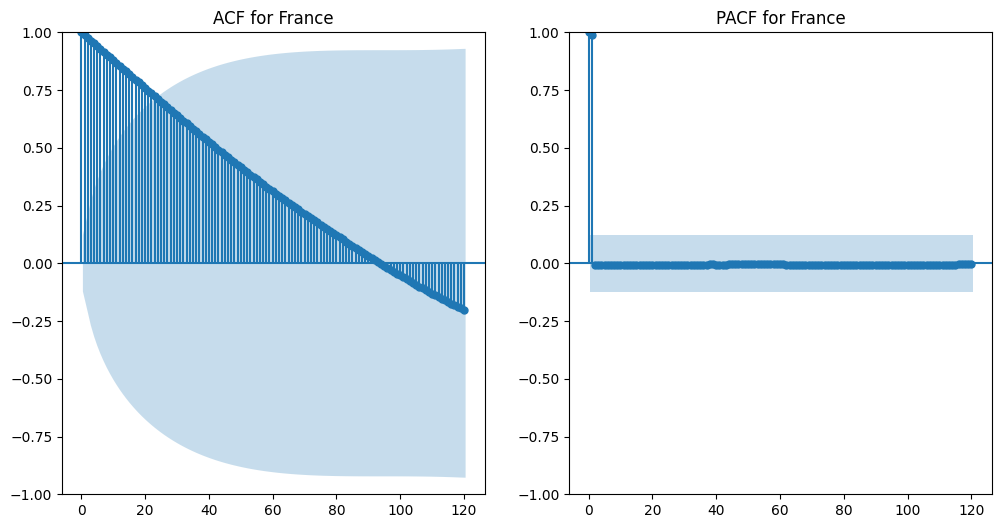

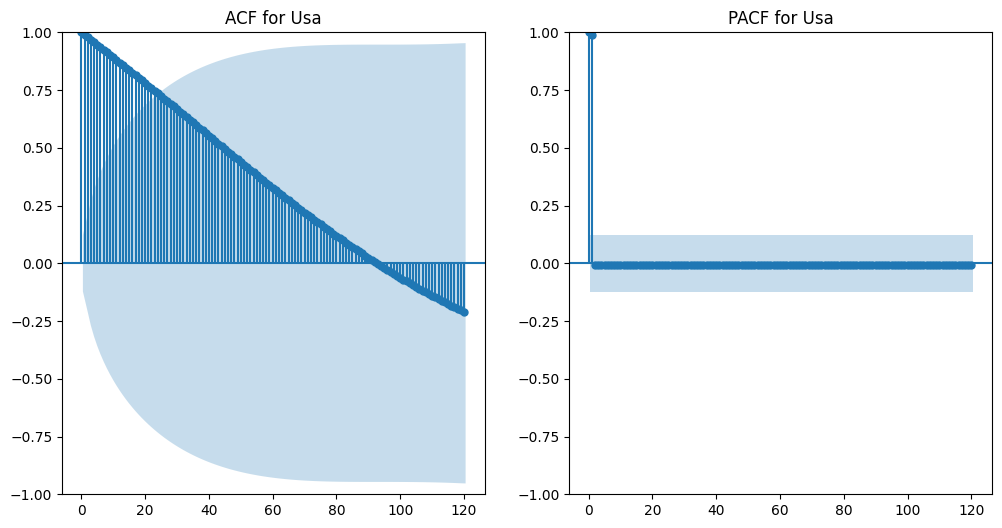

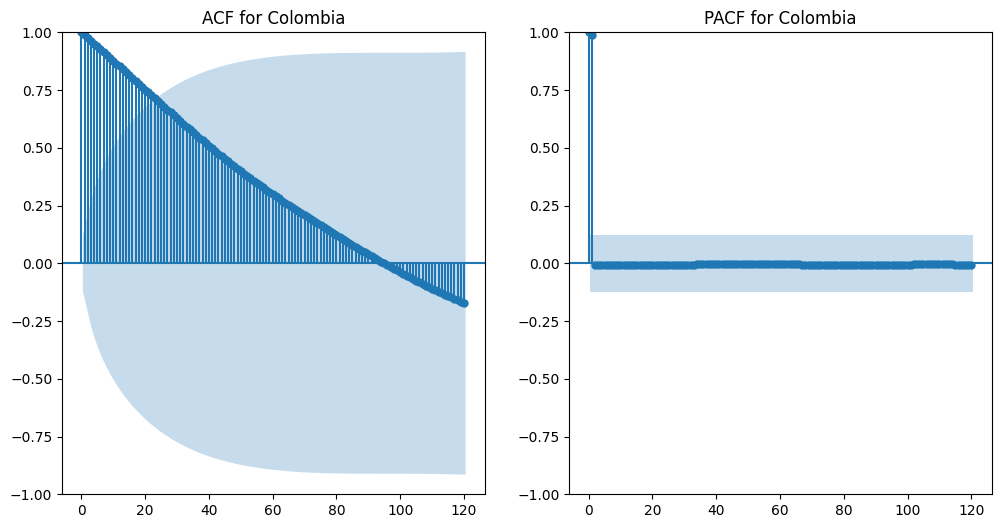

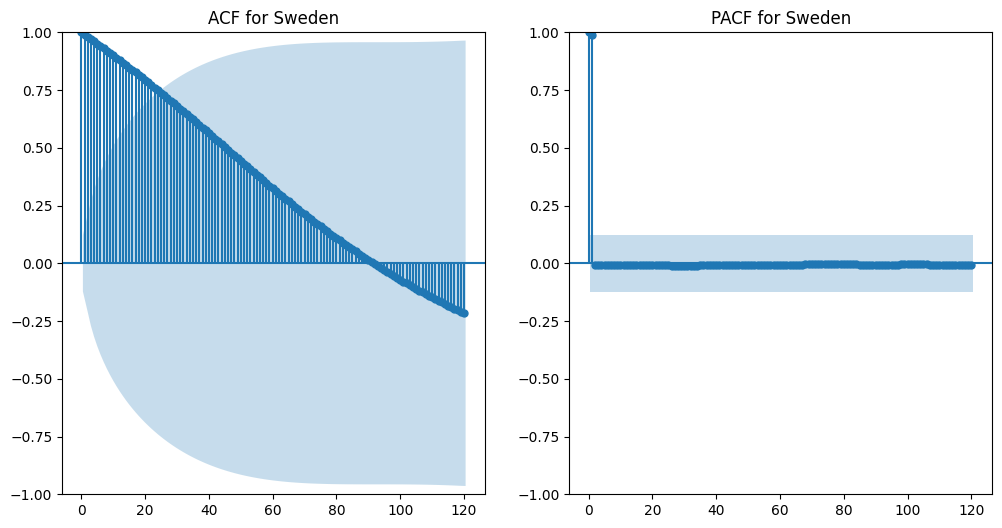

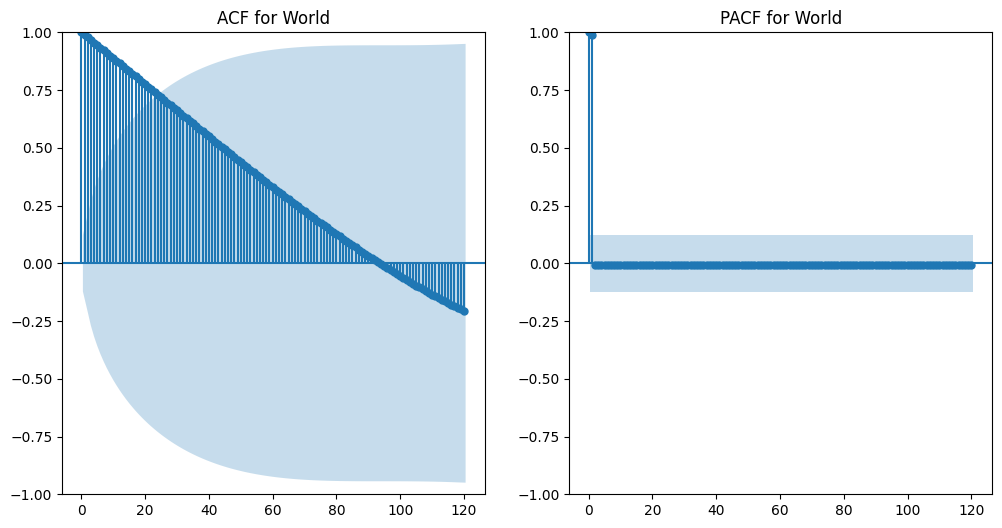


Best ARIMA Orders for Each Column:
{'Japan': (2, 2, 26), 'France': (2, 0, 34), 'Usa': (2, 3, 36), 'Colombia': (2, 2, 33), 'Sweden': (2, 2, 37), 'World': (2, 3, 36)}


In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def analyze_arima_orders(data, stationnarity_orders,max_lags=120, acf_pacf_lags=120 ):
    """
    Analyze and find the best ARIMA orders for each column in a DataFrame based on ACF and PACF.

    :param data: A pandas DataFrame with time series data
    :param max_lags: The maximum number of lags to consider for finding the best ARIMA order
    :param acf_pacf_lags: Number of lags to show in ACF and PACF plots
    :return: Dictionary with the best ARIMA orders for each column
    """
    best_orders = {}

    for column in data.columns:
        time_series = data[column]

        # ACF and PACF plots
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_acf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'ACF for {column}')

        plt.subplot(122)
        plot_pacf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'PACF for {column}')
        plt.show()

        # Find the best ARIMA order
        lag_acf = acf(time_series, nlags=max_lags)
        lag_pacf = pacf(time_series, nlags=max_lags, method='ols')

        p = next((x for x, val in enumerate(lag_pacf) if val < abs(0.6)), 0)
        q = next((x for x, val in enumerate(lag_acf) if val < abs(0.6)), 0)

        best_orders[column] = (p, stationnarity_orders.get(column,0), q)  # Assuming d=0 for simplicity

    return best_orders

# Usage example
# Replace 'your_dataframe' with your actual DataFrame
best_pacf_acf_orders = analyze_arima_orders(decomposed_data,trend_orders)
print("\nBest ARIMA Orders for Each Column:")
print(best_pacf_acf_orders)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

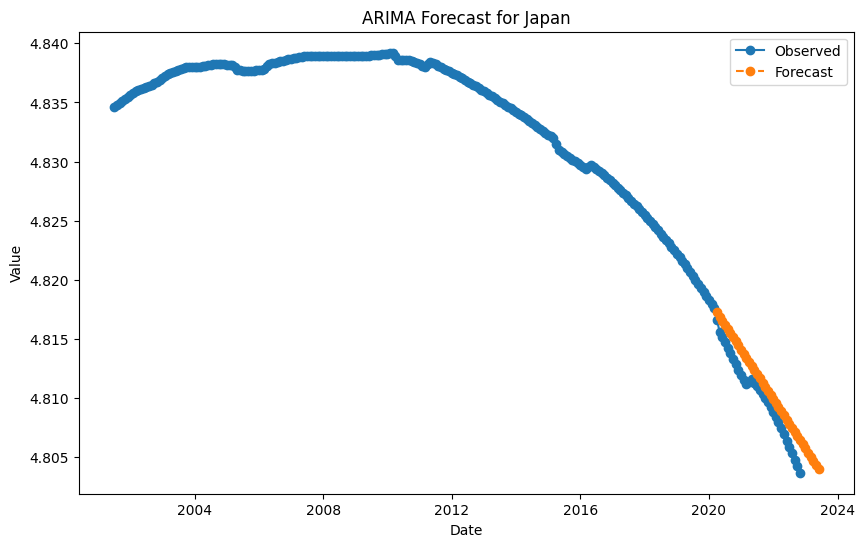

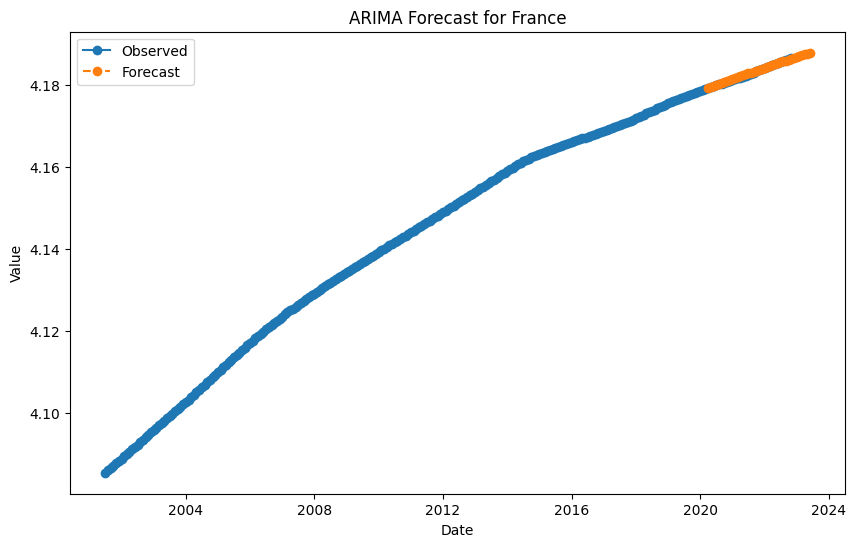

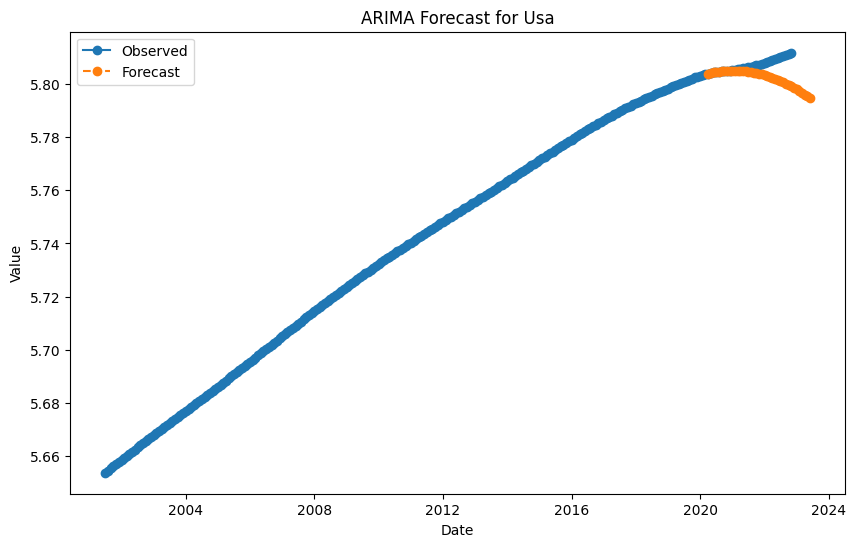

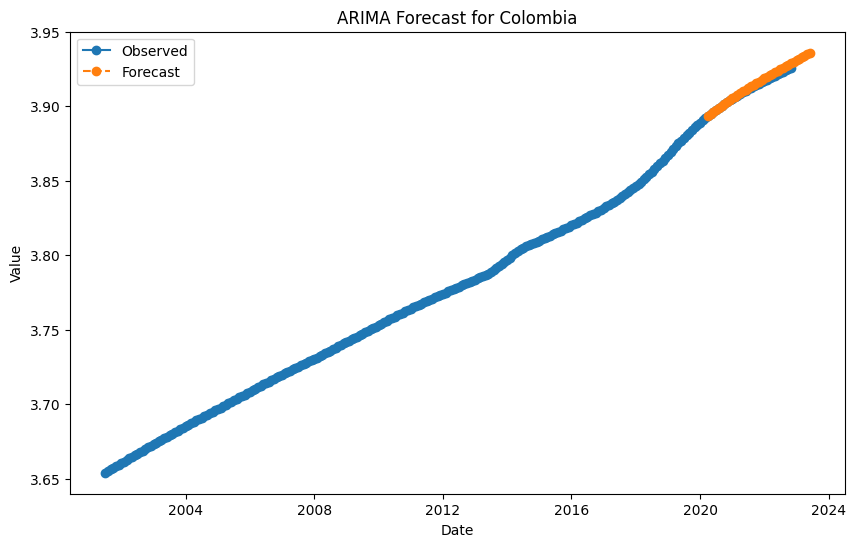

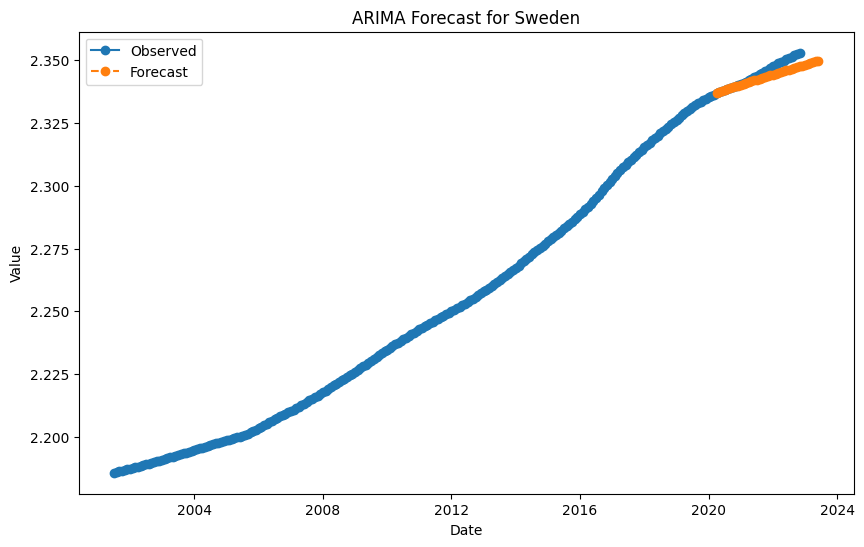

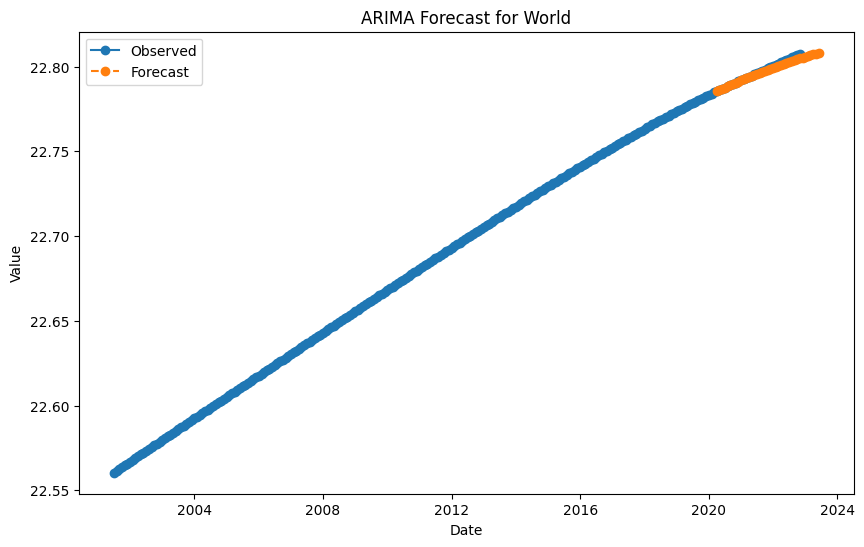

In [21]:


# Determine differencing orders

# Use pre-determined differencing orders to find best ARIMA orders

# Use best_orders to forecast with ARIMA models
arima_models = ARIMA_forecast(decomposed_data, best_pacf_acf_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=39)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(decomposed_data.index, decomposed_data[column], label='Observed', marker='o')
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--', marker='o')

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [22]:
best_pacf_acf_orders

{'Japan': (2, 2, 26),
 'France': (2, 0, 34),
 'Usa': (2, 3, 36),
 'Colombia': (2, 2, 33),
 'Sweden': (2, 2, 37),
 'World': (2, 3, 36)}

##Fit a Hybrid Arima onto the trend of the countries


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Japan: 0.042


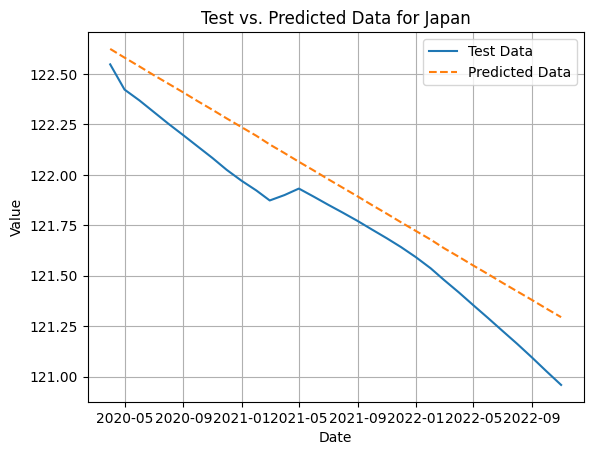

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for France: 0.000


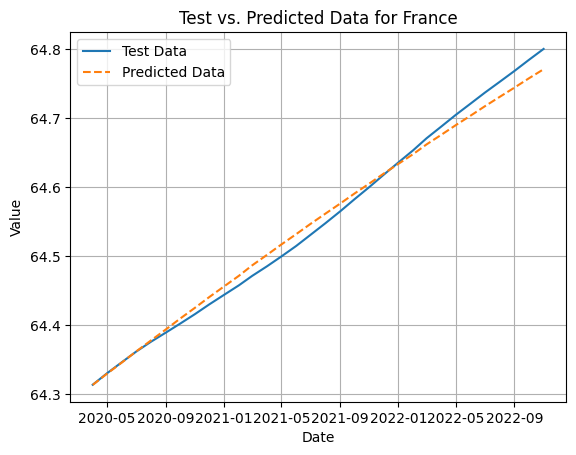

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for Usa: 1.078


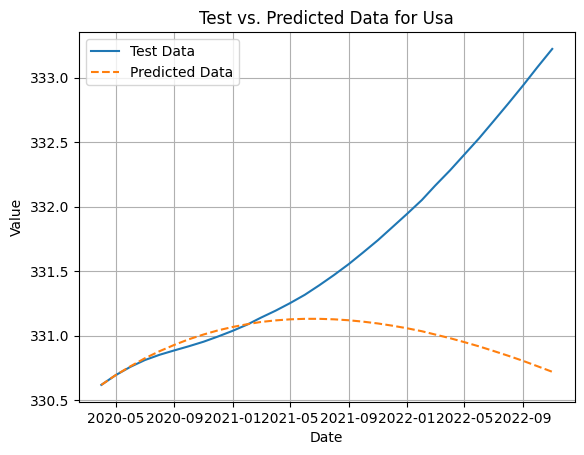

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Colombia: 0.020


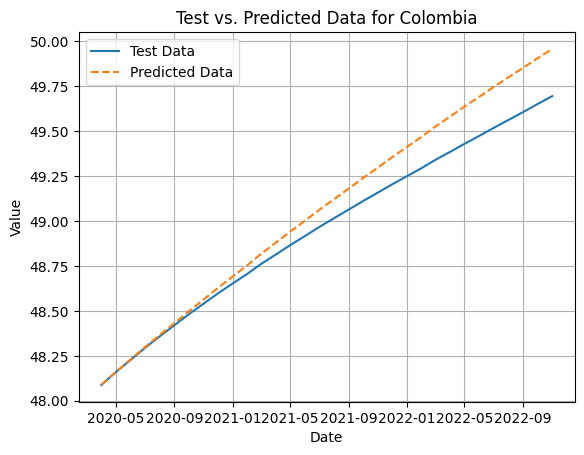

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Sweden: 0.001


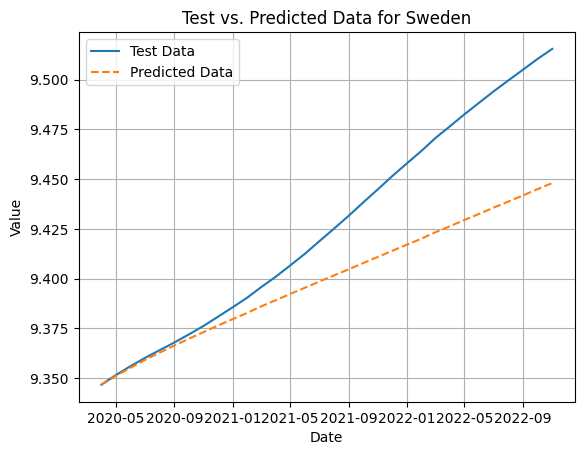

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for World: 82147306386703.953


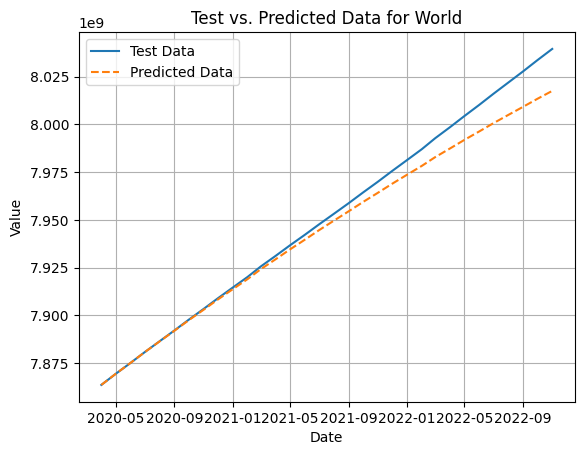

Test Errors:
               Japan    France       Usa  Colombia    Sweden         World
Date                                                                      
2020-04-01 -0.076583  0.000268  0.000221 -0.000240  0.000121 -6.902806e+02
2020-05-01 -0.158380  0.000596 -0.000236 -0.000956  0.000451 -2.316520e+03
2020-06-01 -0.168275  0.000485 -0.004228 -0.002334  0.000812 -4.863822e+03
2020-07-01 -0.182378 -0.000229 -0.013900 -0.004468  0.001029  1.007871e+04
2020-08-01 -0.198649 -0.001881 -0.027806 -0.007512  0.001242  6.094013e+04
2020-09-01 -0.211956 -0.004556 -0.042784 -0.011549  0.001581  1.478043e+05
2020-10-01 -0.224443 -0.007294 -0.054035 -0.016639  0.002150  2.707365e+05
2020-11-01 -0.238740 -0.009180 -0.055992 -0.022851  0.003096  4.298025e+05
2020-12-01 -0.254910 -0.010631 -0.047747 -0.030289  0.004407  6.250729e+05
2021-01-01 -0.265708 -0.012232 -0.029967 -0.038714  0.005964  8.566212e+05
2021-02-01 -0.270989 -0.013818 -0.002392 -0.047526  0.007690  1.124520e+06
2021-03-01 -

In [37]:
def hybrid_arima(data,best_order):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data =   data   # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Find the best order
        #best_order = find_best_order_single_column(train, test, column, orders, max_ar=5, max_ma=5)

        # Fit the ARIMA model
        model = ARIMA(train, order=best_order.get(column,0))
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))

        # Calculate errors
        error_list = np.expm1(test) - np.expm1(predictions)
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store the test errors
        test_errors[column] = error_list

        # Store the training errors
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)

        # Store the predictions
        predictions_df[column] = np.expm1(predictions)

        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: %.3f' % test_error)
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set

# Example usage:
# Assuming 'data' is a DataFrame containing multiple columns of time series data
# Replace 'data' with your actual dataset

test_errors, training_errors, predictions_df,test_s = hybrid_arima(decomposed_data,best_pacf_acf_orders)

# Access the DataFrames with test errors, training errors, and predictions
print("Test Errors:")
print(test_errors)

print("\nTraining Errors:")
print(training_errors)

print("\nPredictions:")
print(predictions_df)

In [24]:

# Assuming you have defined training_residuals as a DataFrame with one column per country
test_pred = pd.DataFrame()

# Define the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over columns (countries) in training_residuals
for i in training_errors.columns:
    train_resid = training_errors[i].values.reshape(-1, 1)
    test_resid = test_errors[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Use the same model for all countries
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred[i] = test_predictions.flatten()


1/1 [==============================] - 0s 16ms/step


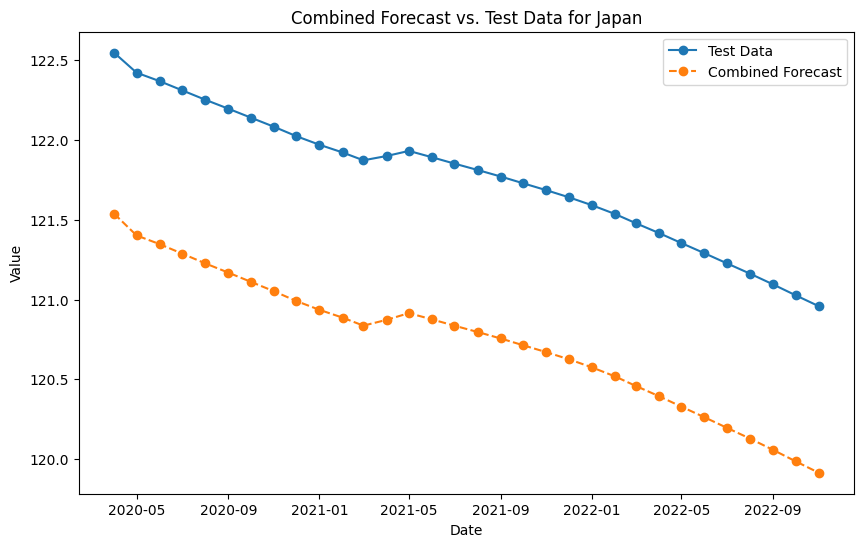

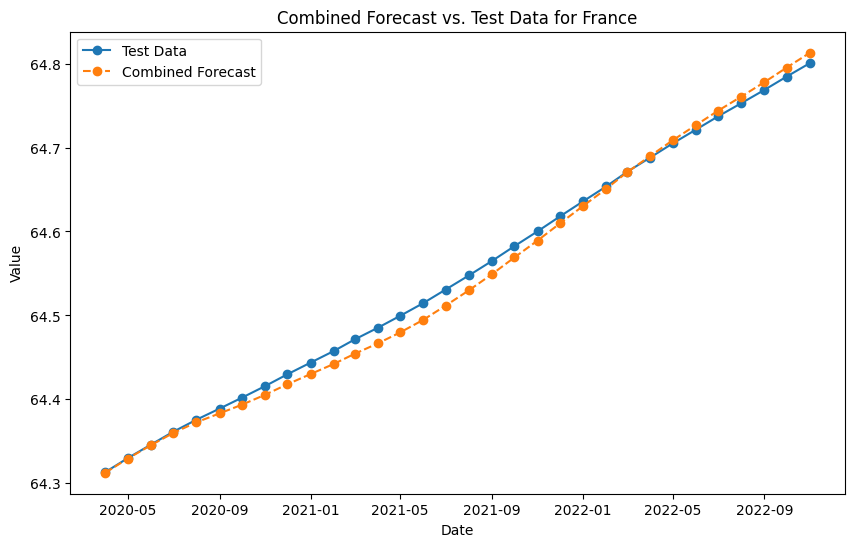

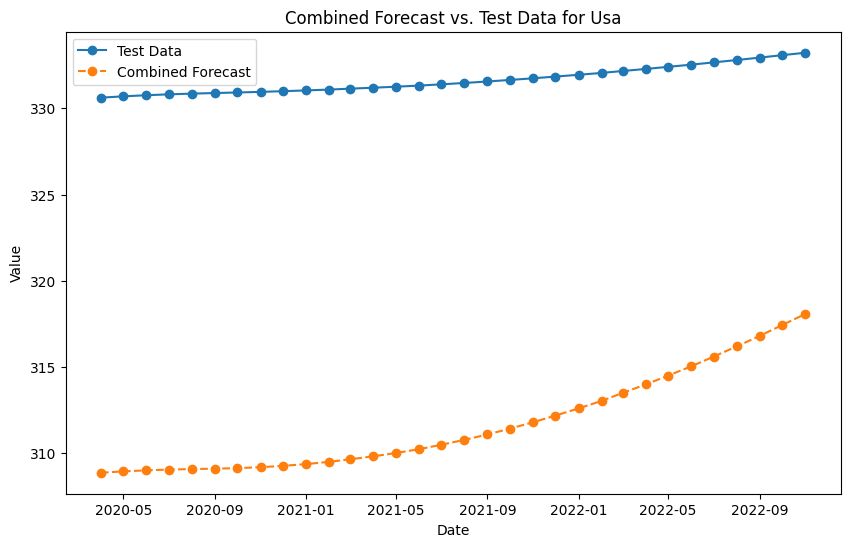

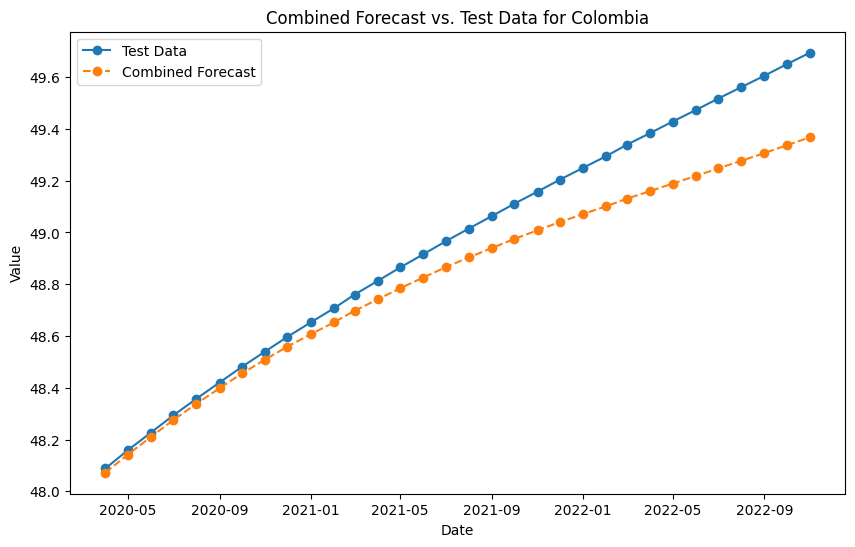

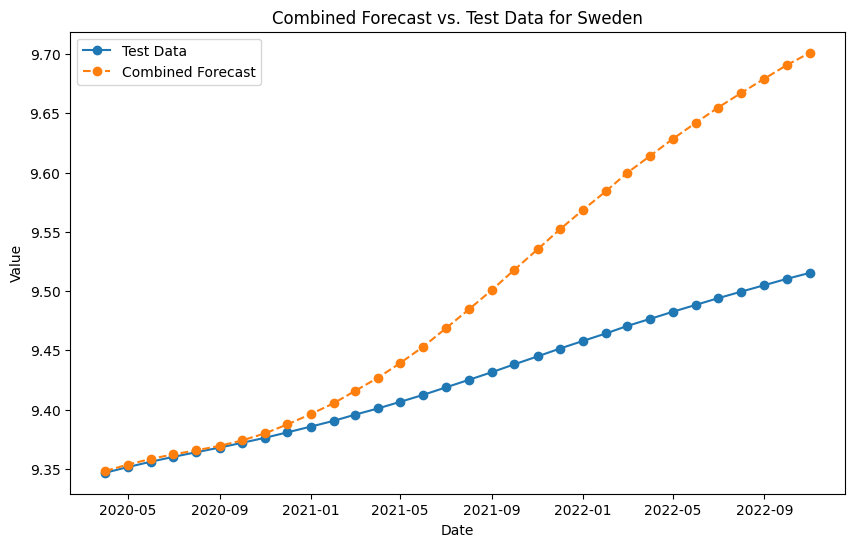

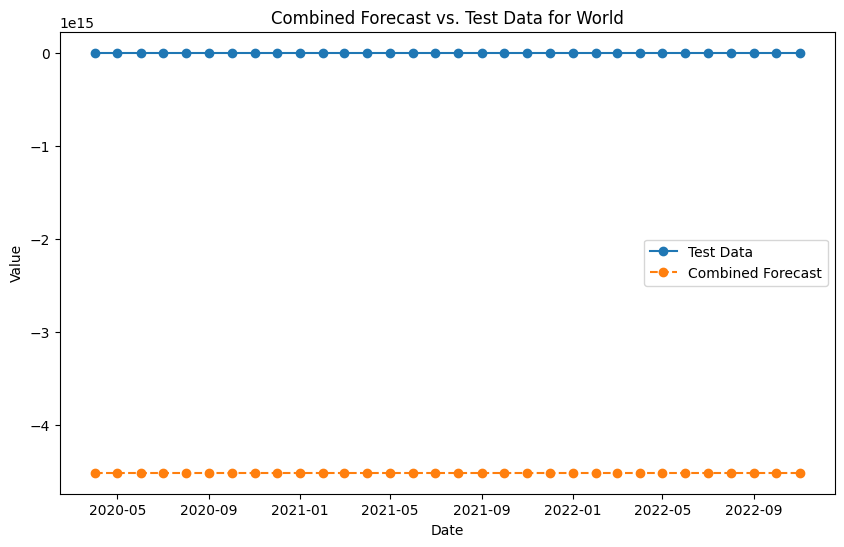

                 Japan     France         Usa   Colombia    Sweden  \
Date                                                                 
2020-04-01  121.538289  64.312496  308.873765  48.071681  9.348249   
2020-05-01  121.402337  64.329366  308.950723  48.141909  9.353558   
2020-06-01  121.347580  64.345271  309.012656  48.209802  9.358427   
2020-07-01  121.288528  64.359895  309.057011  48.275343  9.362220   
2020-08-01  121.227225  64.372597  309.085719  48.338225  9.365658   
2020-09-01  121.169063  64.383206  309.109522  48.398263  9.369386   
2020-10-01  121.111745  64.393553  309.140531  48.455283  9.373933   
2020-11-01  121.052534  64.405403  309.194156  48.509057  9.379992   
2020-12-01  120.991222  64.417959  309.271707  48.559210  9.387550   
2021-01-01  120.935987  64.430093  309.375228  48.606385  9.396127   
2021-02-01  120.887000  64.442125  309.504292  48.652273  9.405417   
2021-03-01  120.836683  64.454216  309.654658  48.697459  9.415564   
2021-04-01  120.8729

In [26]:
# Assuming 'test' is your observed test data

# Create a DataFrame to store combined forecasts for each country
combined_forecasts = pd.DataFrame(index=test_s.index)

# Iterate over columns (countries)
for column in predictions_df.columns:
    final_forecasts = predictions_df[column].values + test_pred[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_s.index, test_s[column], label='Test Data', marker='o')
    plt.plot(test_s.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts[column] = final_forecasts

# Display the combined forecasts DataFrame
print(combined_forecasts)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Dictionary to store accuracy metrics for each country
accuracy_metrics = {}

# Analyzing forecasts for each country
for column in combined_forecasts.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_s[column], combined_forecasts[column])
    accuracy_metrics[column] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'Bias': bias}

# Displaying accuracy metrics for each country
for country, metrics in accuracy_metrics.items():
    print(f"Accuracy Metrics for {country}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print("\n")


Accuracy Metrics for Japan:
MSE: 1.05
MAE: 1.03
RMSE: 1.03
MAPE: 0.84
Bias: -1.03


Accuracy Metrics for France:
MSE: 0.00
MAE: 0.01
RMSE: 0.01
MAPE: 0.01
Bias: -0.01


Accuracy Metrics for Usa:
MSE: 400.91
MAE: 19.92
RMSE: 20.02
MAPE: 6.01
Bias: -19.92


Accuracy Metrics for Colombia:
MSE: 0.03
MAE: 0.13
RMSE: 0.17
MAPE: 0.27
Bias: -0.13


Accuracy Metrics for Sweden:
MSE: 0.01
MAE: 0.07
RMSE: 0.10
MAPE: 0.75
Bias: 0.07


Accuracy Metrics for World:
MSE: 20402303825626891632270154661888.00
MAE: 4516890946837979.00
RMSE: 4516890946837979.00
MAPE: 56812225.68
Bias: -4516890946837979.00




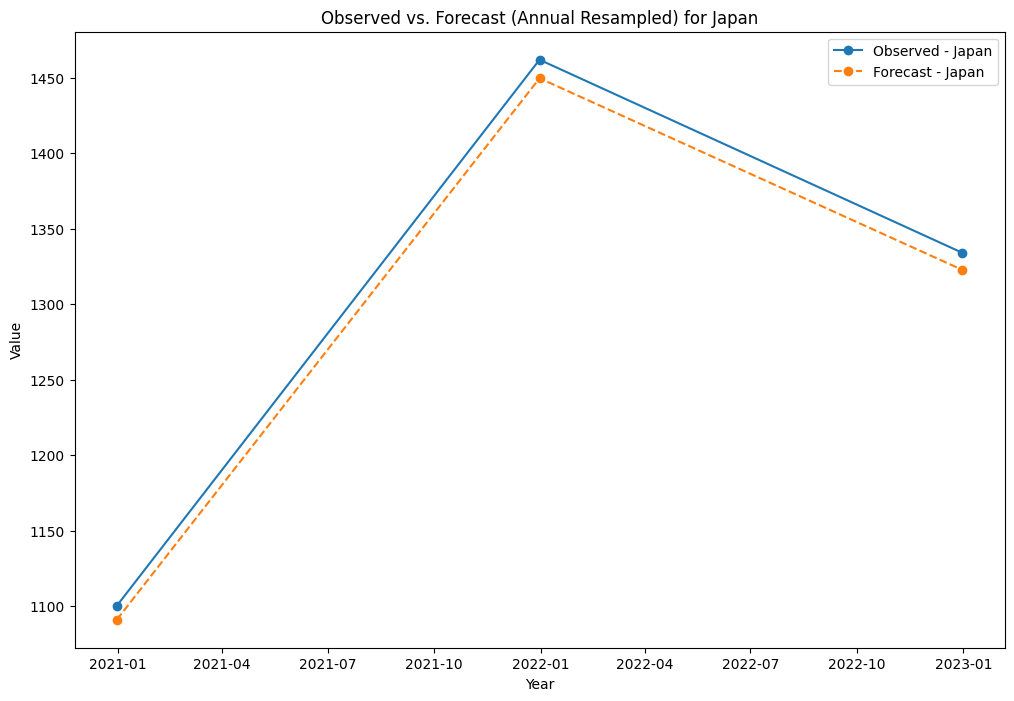

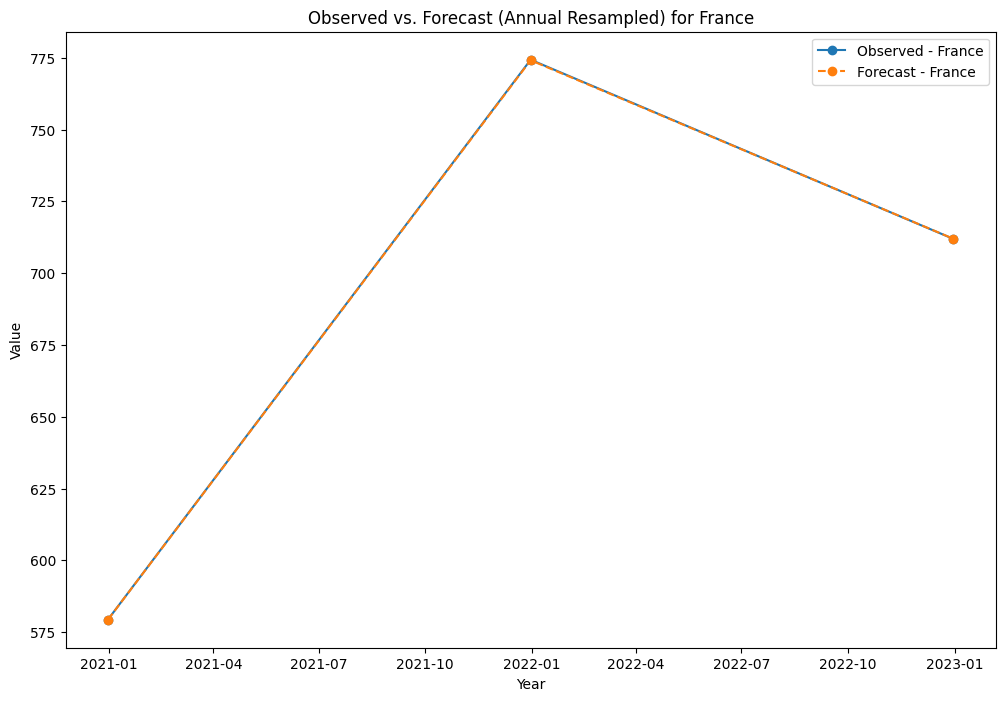

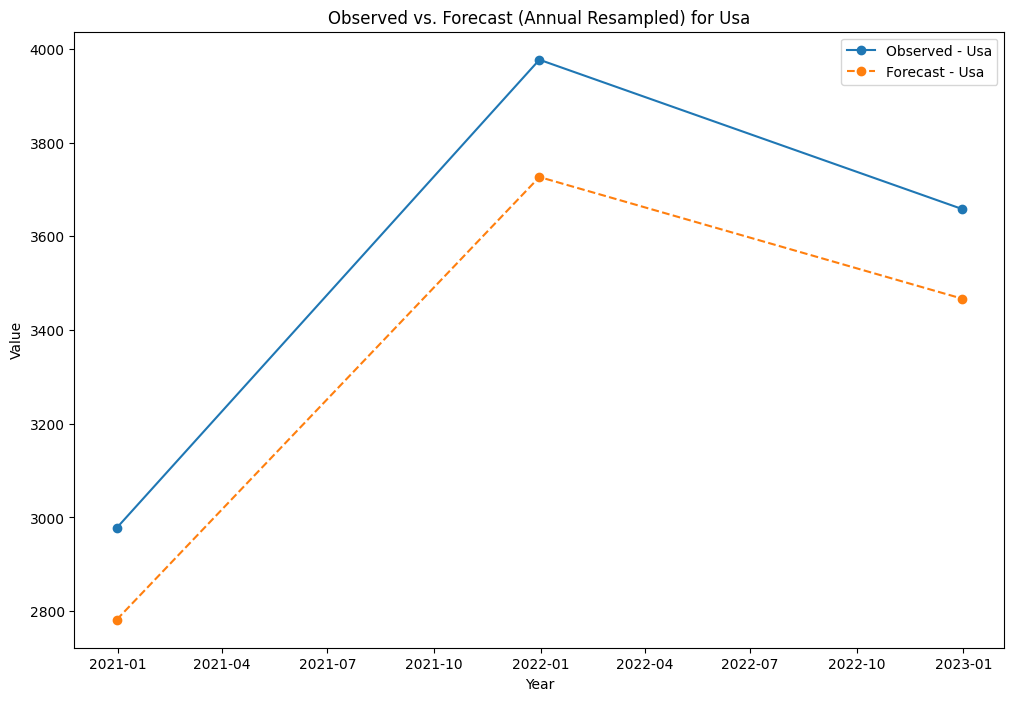

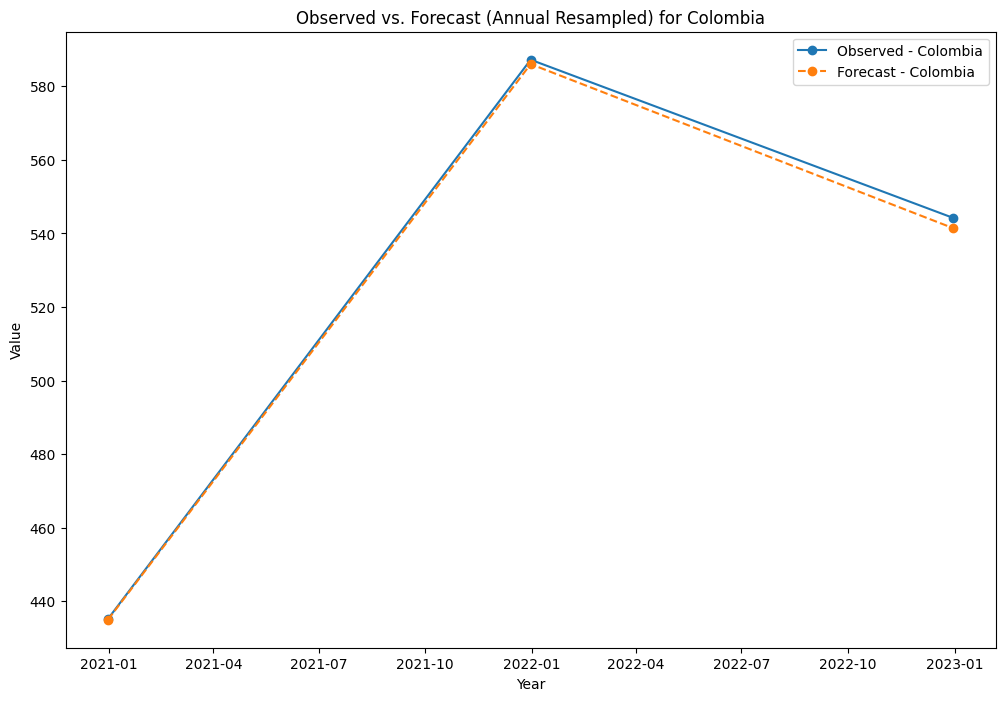

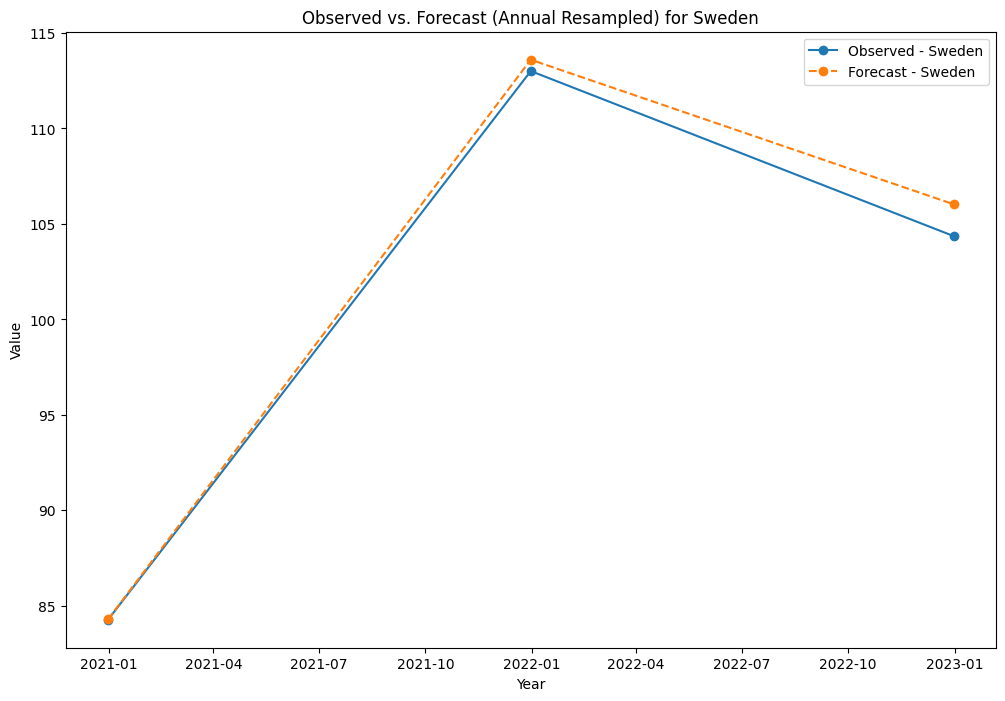

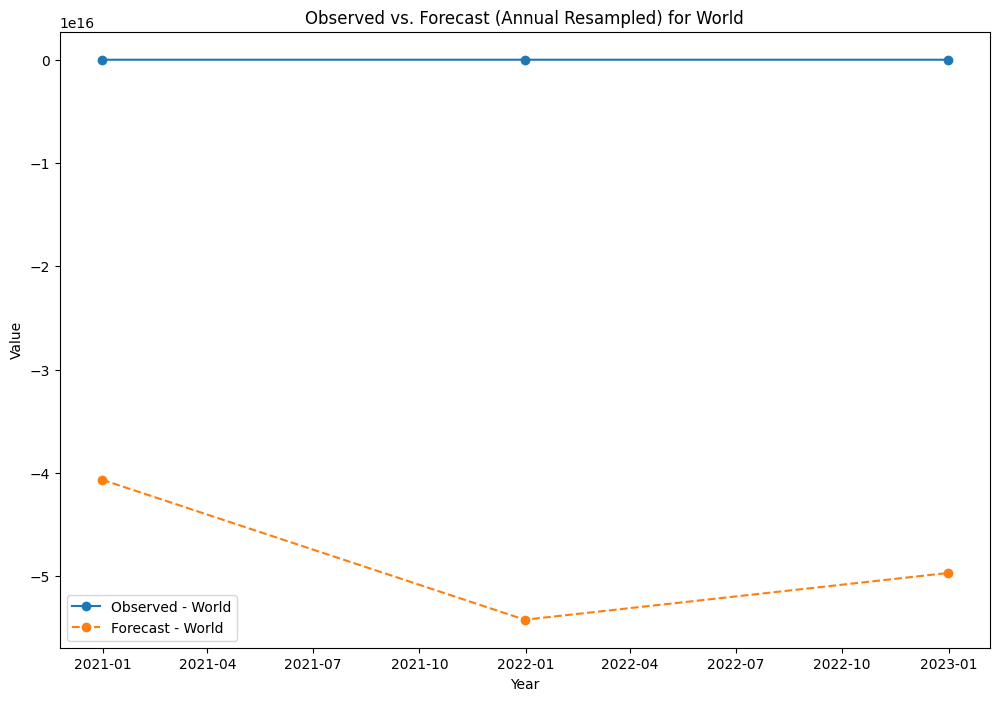

In [28]:
# Assuming 'test_s' is your observed test data
# Resample the observed test data to annual frequency
test_s_annual = test_s.resample('A').sum()




# Resample the forecasted data to annual frequency
combined_forecasts_annual = combined_forecasts.resample('A').sum()

# Plot the observed vs. forecast values for each country
for column in combined_forecasts_annual.columns:
    plt.figure(figsize=(12, 8))
    plt.plot(test_s_annual.index, test_s_annual[column], label=f'Observed - {column}', marker='o')
    plt.plot(combined_forecasts_annual.index, combined_forecasts_annual[column], label=f'Forecast - {column}', linestyle='--', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Observed vs. Forecast (Annual Resampled) for {column}')
    plt.legend()
    plt.show()



<ipython-input-29-40f054503a30>:15: RuntimeWarning: overflow encountered in accumulate
  forecasted_population =  df[df[column].index=='2020-04-01'][column].values * growth_rates.cumprod()


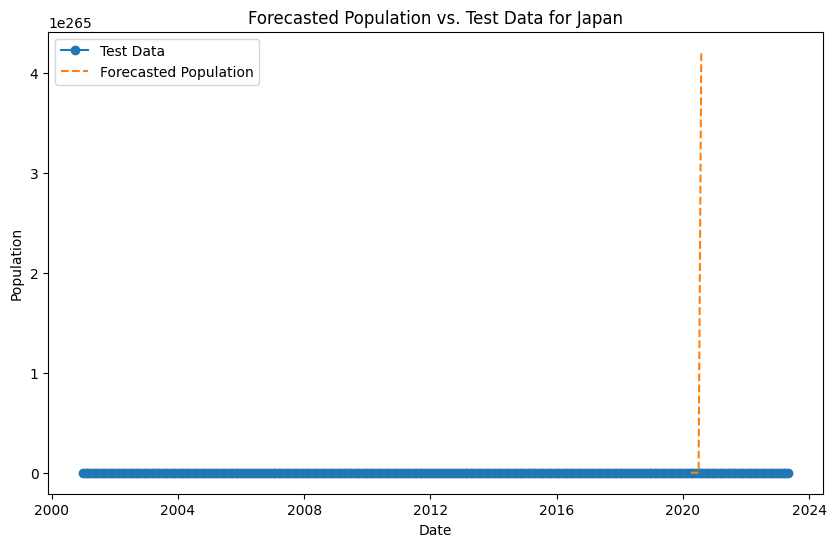

<ipython-input-29-40f054503a30>:15: RuntimeWarning: overflow encountered in multiply
  forecasted_population =  df[df[column].index=='2020-04-01'][column].values * growth_rates.cumprod()


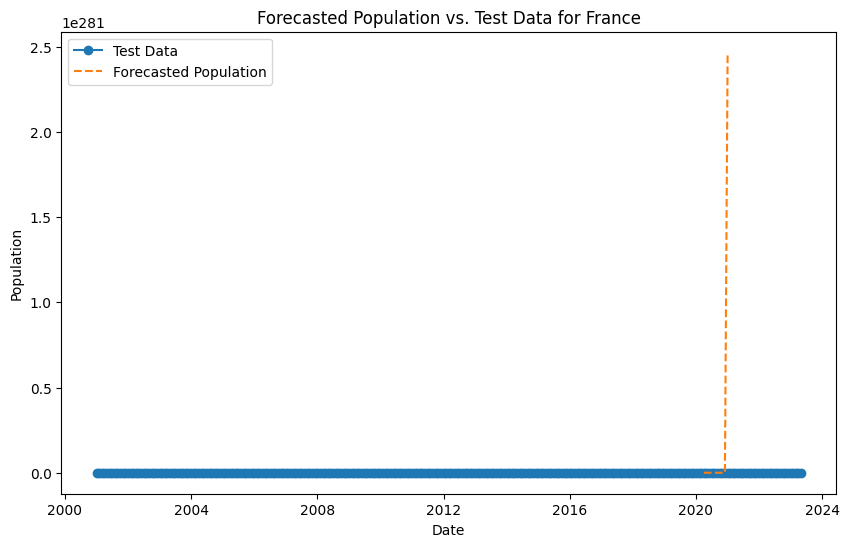

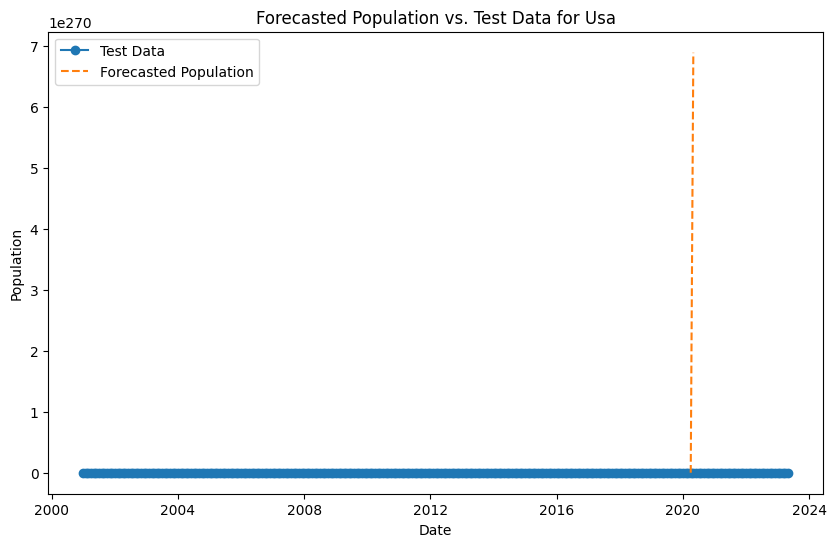

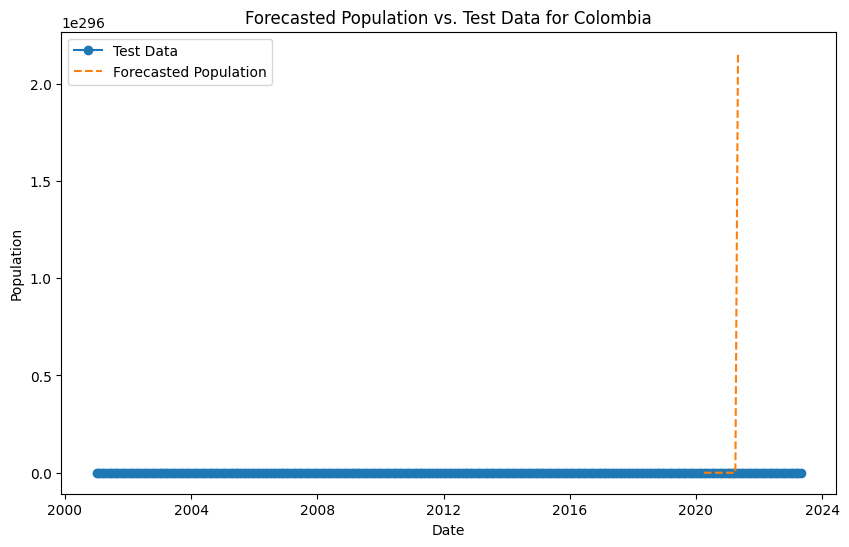

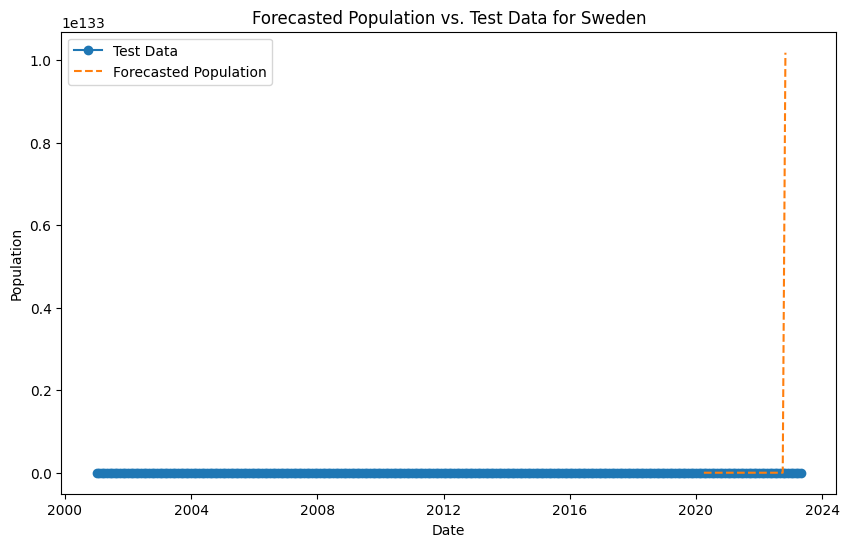

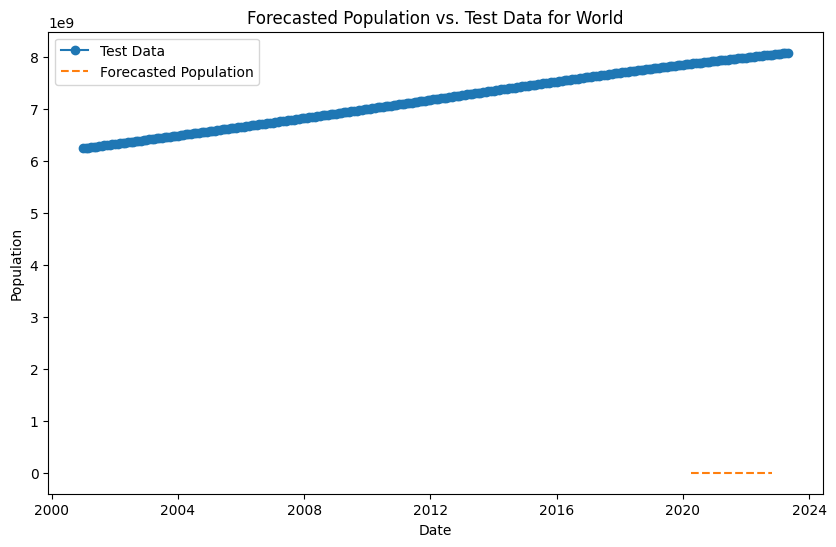

                 Japan     France         Usa   Colombia    Sweden  \
Date                                                                 
2020-04-01  121.538289  64.312496  308.873765  48.071681  9.348249   
2020-05-01  121.402337  64.329366  308.950723  48.141909  9.353558   
2020-06-01  121.347580  64.345271  309.012656  48.209802  9.358427   
2020-07-01  121.288528  64.359895  309.057011  48.275343  9.362220   
2020-08-01  121.227225  64.372597  309.085719  48.338225  9.365658   
2020-09-01  121.169063  64.383206  309.109522  48.398263  9.369386   
2020-10-01  121.111745  64.393553  309.140531  48.455283  9.373933   
2020-11-01  121.052534  64.405403  309.194156  48.509057  9.379992   
2020-12-01  120.991222  64.417959  309.271707  48.559210  9.387550   
2021-01-01  120.935987  64.430093  309.375228  48.606385  9.396127   
2021-02-01  120.887000  64.442125  309.504292  48.652273  9.405417   
2021-03-01  120.836683  64.454216  309.654658  48.697459  9.415564   
2021-04-01  120.8729

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'test_s' is your observed test data with actual population levels
# 'predictions_df' and 'test_pred' contain predicted and observed log(growth rates), respectively



for column in combined_forecasts.columns:
    # Convert log(growth rates) back to growth rates
    growth_rates = np.exp(combined_forecasts[column].values )

    # Calculate cumulative product to get the forecasted population levels
    forecasted_population =  df[df[column].index=='2020-04-01'][column].values * growth_rates.cumprod()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column], label='Test Data', marker='o')
    plt.plot(combined_forecasts.index, forecasted_population, label='Forecasted Population', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Population')
    plt.title(f'Forecasted Population vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the forecasted population in the DataFrame

# Display the combined forecasts DataFrame
print(combined_forecasts)


#Fit a AR(1)


In [129]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def ARIMA_forecast(data, best_orders, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    arima_models = {}
    training = pd.DataFrame()
    testing = pd.DataFrame()
    predictions = pd.DataFrame()
    population_gap = pd.DataFrame()
    metrics = pd.DataFrame(columns=['Country', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Bias'])

    for column, order in best_orders.items():
        series = data[column]
        p, d, q = order

        # Split the data into training and testing
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        training[column] = training_data
        testing[column] = testing_data

        try:
            # Fit an ARIMA model and generate predictions
            model = ARIMA(training_data, order=order)
            arima_model = model.fit()
            arima_models[column] = arima_model
            forecasted_values = arima_model.predict(start=testing_data.index[0], end=testing_data.index[-1])
            predictions[column] = forecasted_values

            # Calculate error metrics
            mse = mean_squared_error(testing_data, forecasted_values)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(testing_data, forecasted_values)
            mape = np.mean(np.abs((testing_data - forecasted_values) / testing_data)) * 100
            bias = np.mean(forecasted_values - testing_data)

            # Append metrics to DataFrame
            metrics = metrics.append({'Country': column, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'Bias': bias}, ignore_index=True)

            # Calculate and store population gap
            gap = testing_data - forecasted_values
            population_gap[column] = gap

        except Exception as e:
            print(f"Error fitting ARIMA model for {column}: {e}")

    return arima_models, population_gap, metrics
def analyze_arima_orders(data, stationnarity_orders,max_lags=120, acf_pacf_lags=120 ):
    """
    Analyze and find the best ARIMA orders for each column in a DataFrame based on ACF and PACF.

    :param data: A pandas DataFrame with time series data
    :param max_lags: The maximum number of lags to consider for finding the best ARIMA order
    :param acf_pacf_lags: Number of lags to show in ACF and PACF plots
    :return: Dictionary with the best ARIMA orders for each column
    """
    best_orders = {}

    for column in data.columns:
        time_series = data[column]

        # ACF and PACF plots
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        sm.graphics.tsa.plot_acf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'ACF for {column}')

        plt.subplot(122)
        sm.graphics.tsa.plot_pacf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'PACF for {column}')
        plt.show()

        # Find the best ARIMA order
        lag_acf = acf(time_series, nlags=max_lags)
        lag_pacf = pacf(time_series, nlags=max_lags, method='ols')

        p = next((x for x, val in enumerate(lag_pacf) if val < abs(0.6)), 0)
        q = next((x for x, val in enumerate(lag_acf) if val < abs(0.6)), 0)

        best_orders[column] = (p, stationnarity_orders.get(column,0), q)  # Assuming d=0 for simplicity

    return best_orders

In [130]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
best_ar_1_orders= {}
# Plot the predictions and observed test data for every country


Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782015444
P-Value: 0.9982025396450246
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.3073067113569596
P-Value: 0.1696222399183679
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025743889
P-Value: 9.007186613061786e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.3218228480975616
P-Value: 0.013930731409084976
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.5728461399

In [131]:
warnings.filterwarnings('ignore')

best_ar_1_orders={}
for i in data_d_orders:
  best_ar_1_orders[i]=(1,data_d_orders.get(i,0),0)


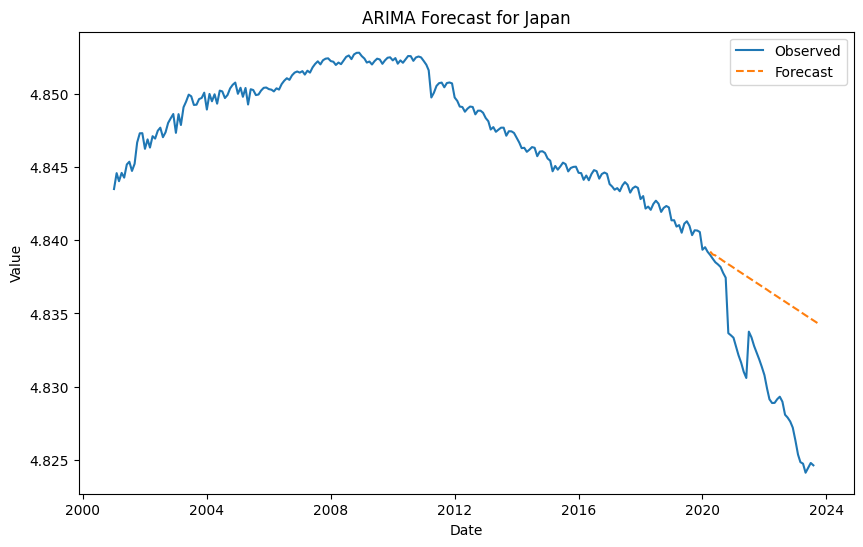

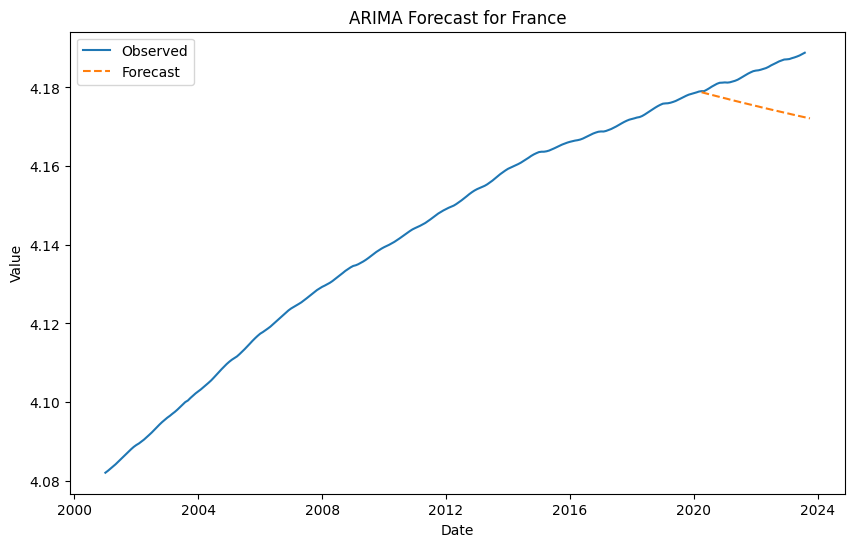

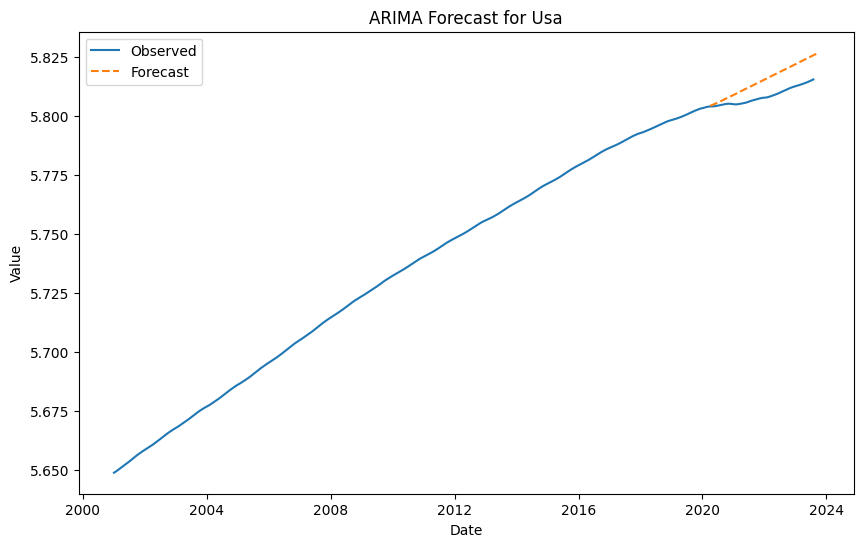

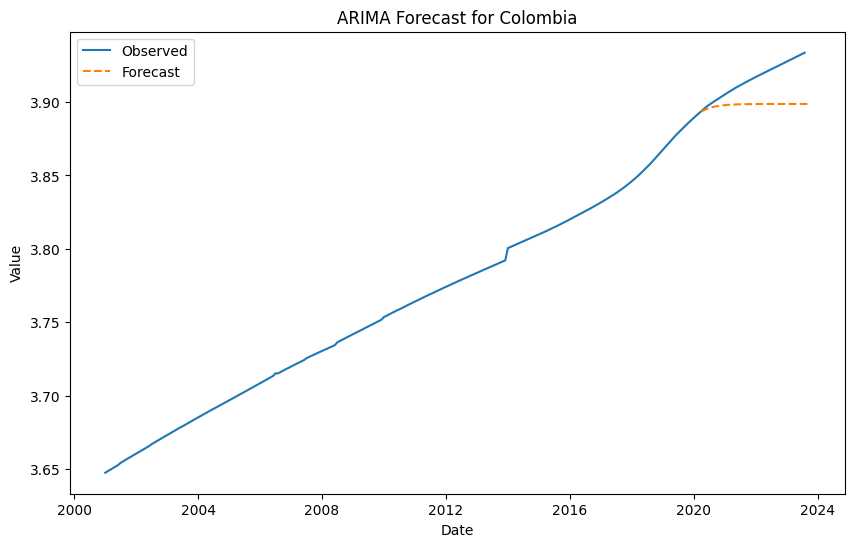

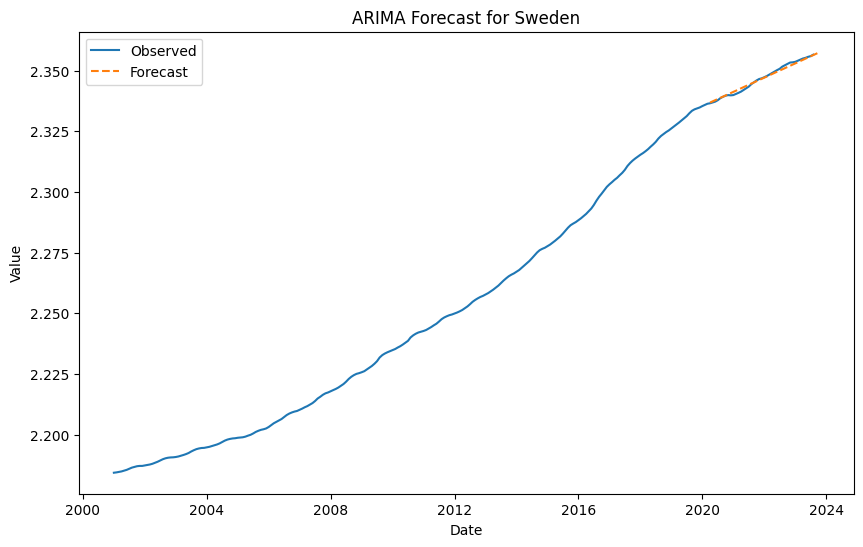

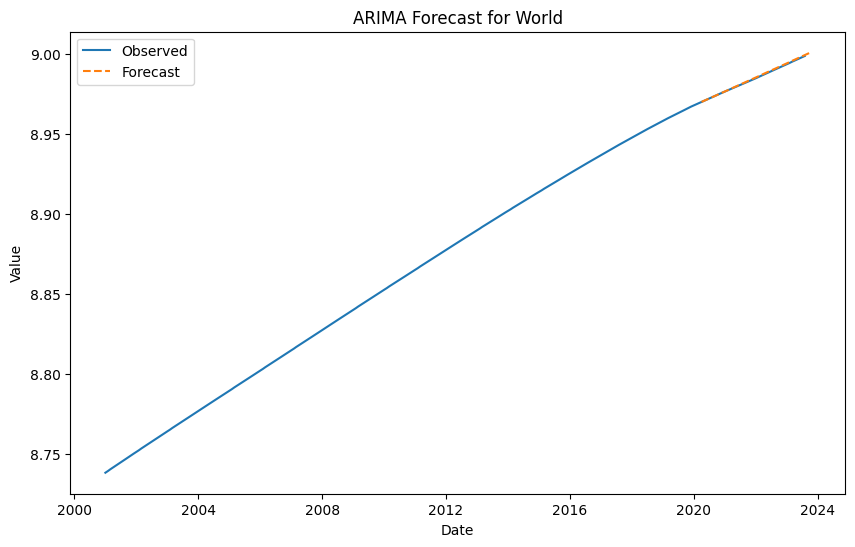

In [132]:


arima_models,pop_gap_ar_1, errors_ar1 = ARIMA_forecast(data, best_ar_1_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label='Observed')
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--'  )

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

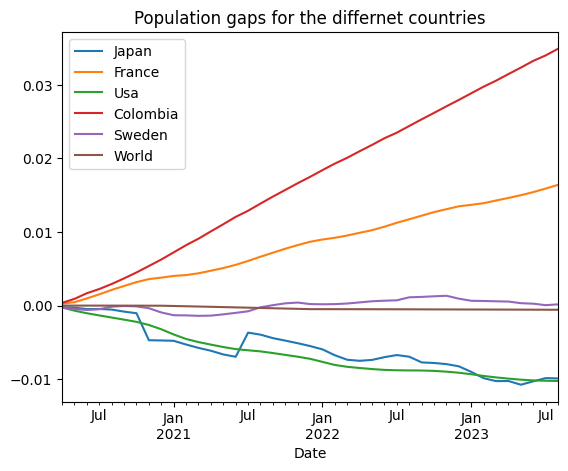

In [133]:
pop_gap_ar_1.plot()
plt.title('Population gaps for the differnet countries')
plt.show()

In [134]:
errors_ar1

Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  4.475344e-05  0.006690  0.005947  0.123156  0.005947
1    France  9.278912e-05  0.009633  0.008374  0.200061 -0.008374
2       Usa  5.187554e-05  0.007202  0.006521  0.112240  0.006521
3  Colombia  4.096837e-04  0.020241  0.017314  0.441430 -0.017314
4    Sweden  5.561803e-07  0.000746  0.000613  0.026116 -0.000025
5     World  1.596820e-07  0.000400  0.000335  0.003723  0.000335

# Fitting an ARIMA (p,d,q)





Results for column 'Japan' (I(0)):
ADF Statistic: 1.7312870782015444
P-Value: 0.9982025396450246
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -2.3073067113569596
P-Value: 0.1696222399183679
Critical Values:
  1%: -3.4558530692911504
  5%: -2.872764881778665
  10%: -2.572751643088207
Series 'Japan' is non-stationary at order I(1) (fail to reject null hypothesis)


Results for column 'Japan' (I(2)):
ADF Statistic: -11.370436025743889
P-Value: 9.007186613061786e-21
Critical Values:
  1%: -3.455952927706342
  5%: -2.8728086526320302
  10%: -2.572774990685656
Series 'Japan' is stationary at order I(2) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -3.3218228480975616
P-Value: 0.013930731409084976
Critical Values:
  1%: -3.4562572510874396
  5%: -2.8729420379793598
  10%: -2.5728461399

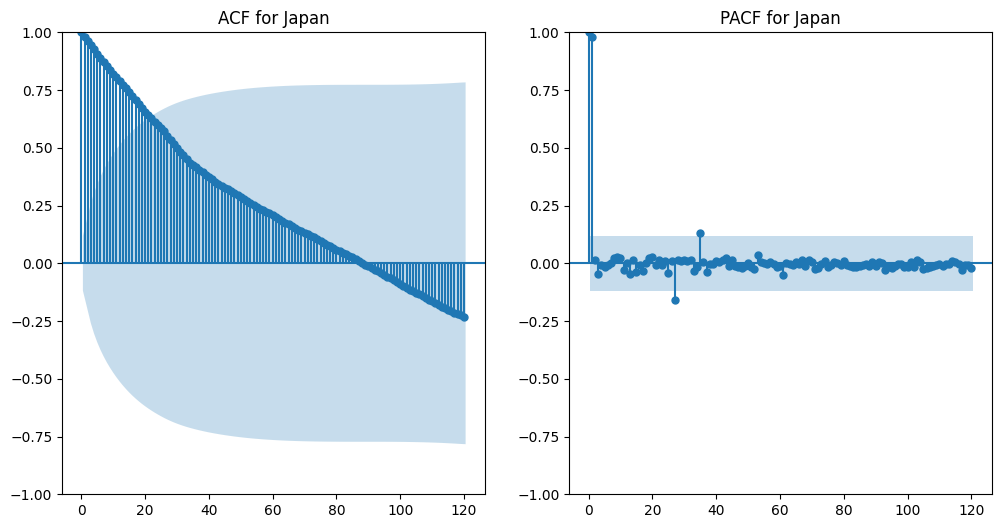

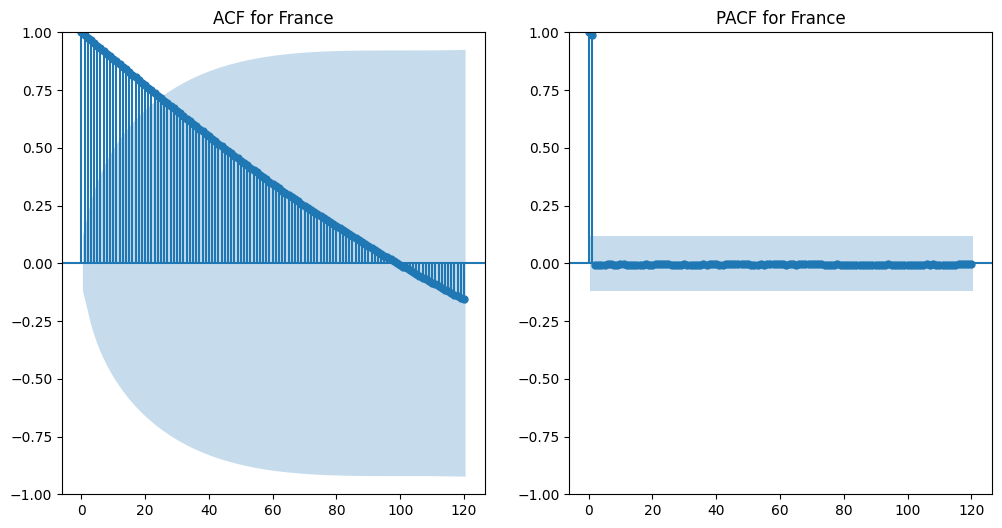

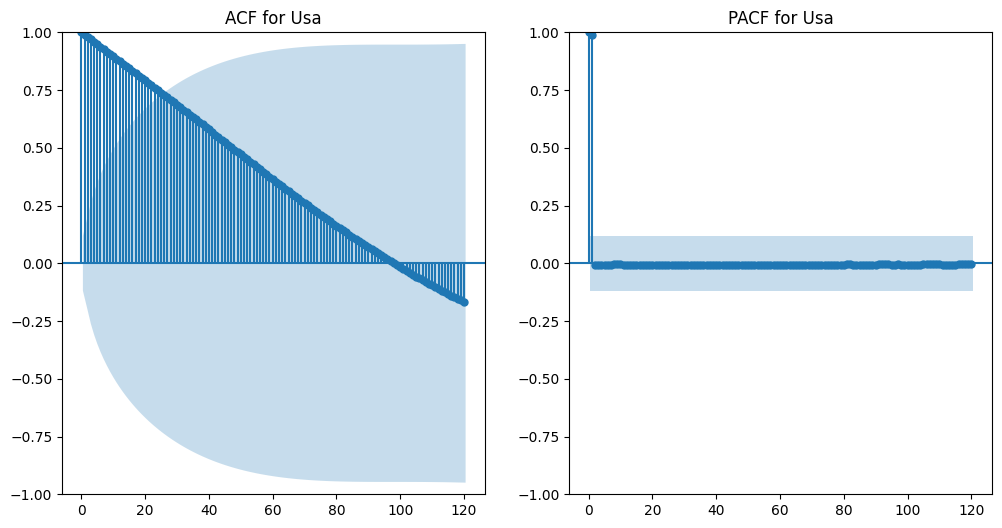

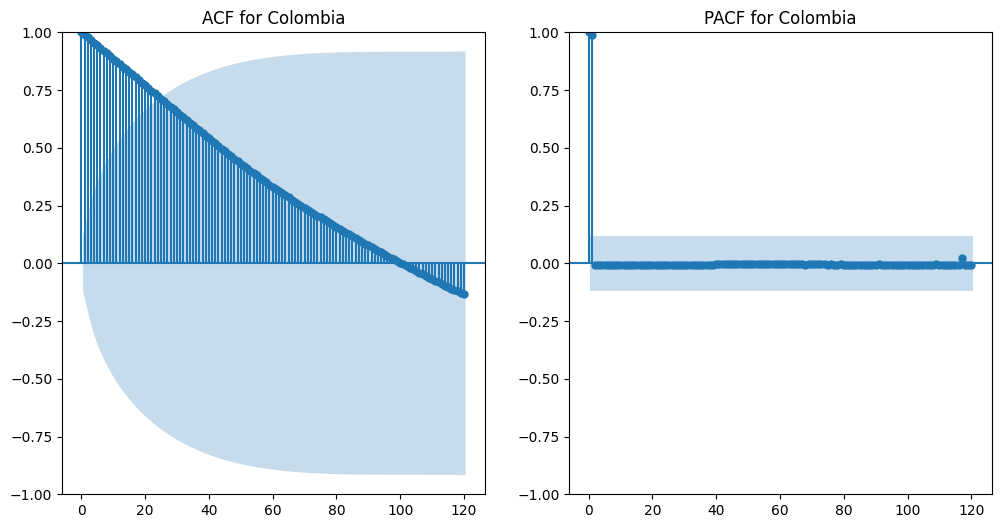

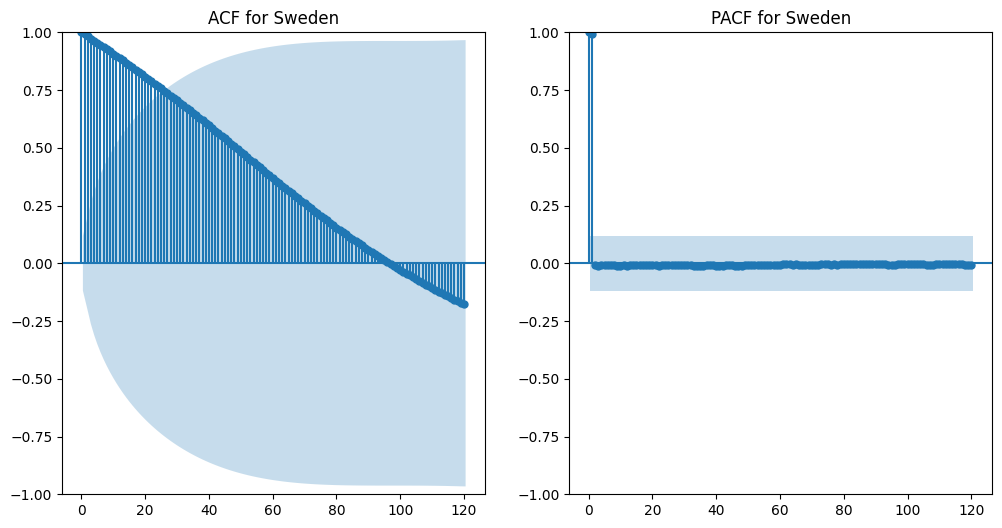

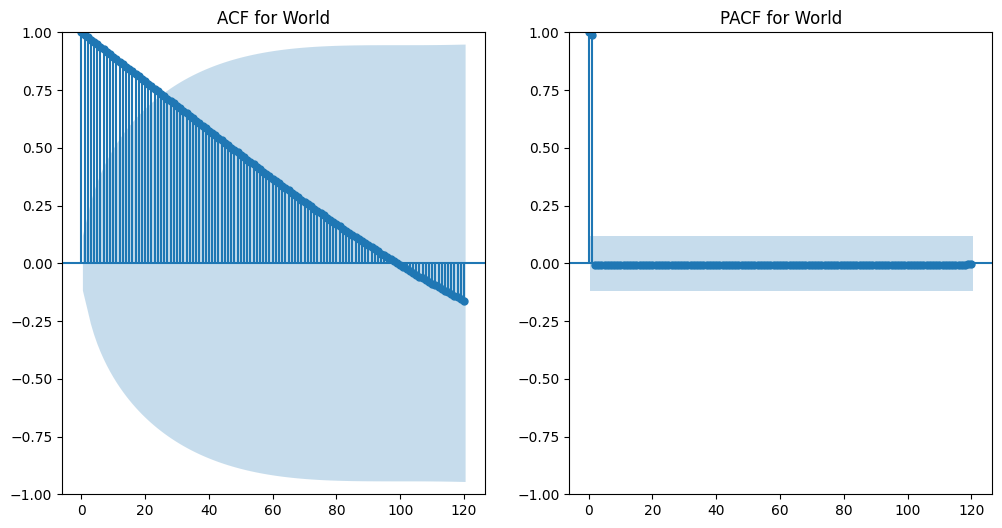


Best ARIMA Orders for Each Column:
{'Japan': (2, 2, 25), 'France': (2, 0, 36), 'Usa': (2, 2, 39), 'Colombia': (2, 1, 35), 'Sweden': (2, 2, 40), 'World': (2, 3, 38)}


In [135]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
best_pacf_acf_orders = analyze_arima_orders(data,data_d_orders)
print("\nBest ARIMA Orders for Each Column:")
print(best_pacf_acf_orders)

In [136]:
best_pacf_acf_orders

{'Japan': (2, 2, 25),
 'France': (2, 0, 36),
 'Usa': (2, 2, 39),
 'Colombia': (2, 1, 35),
 'Sweden': (2, 2, 40),
 'World': (2, 3, 38)}

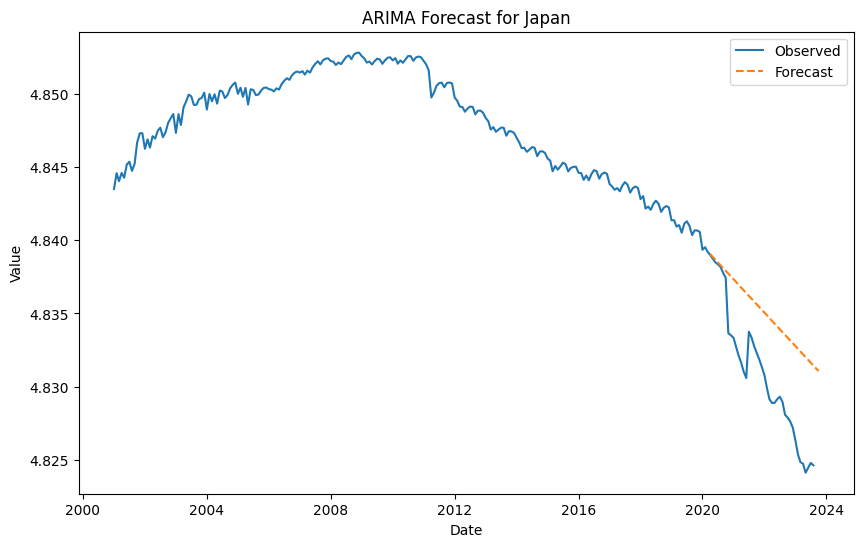

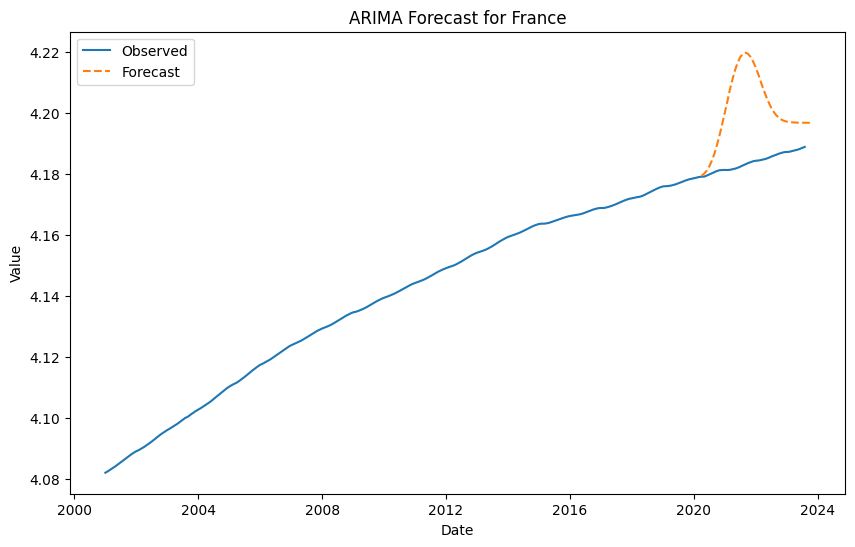

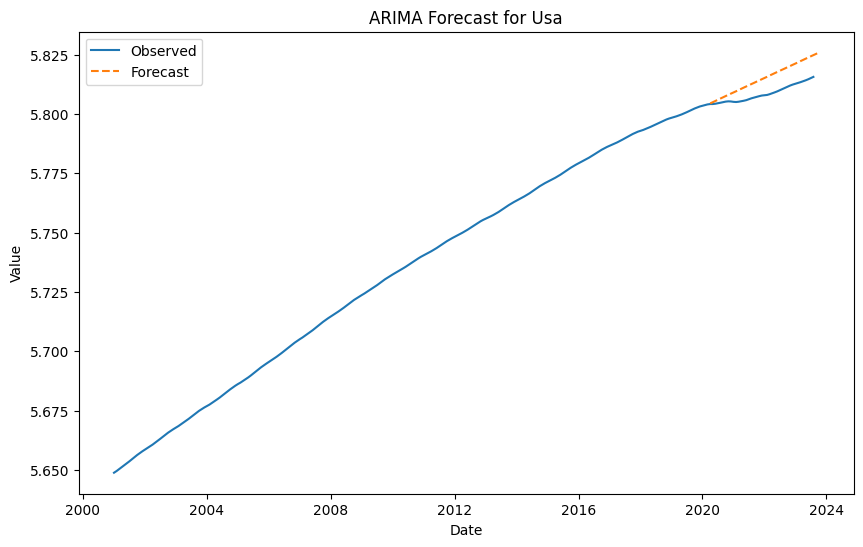

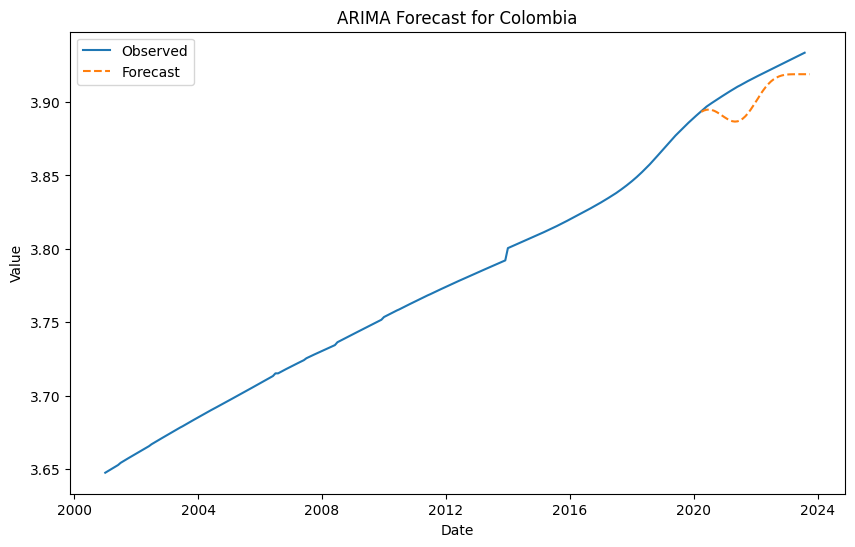

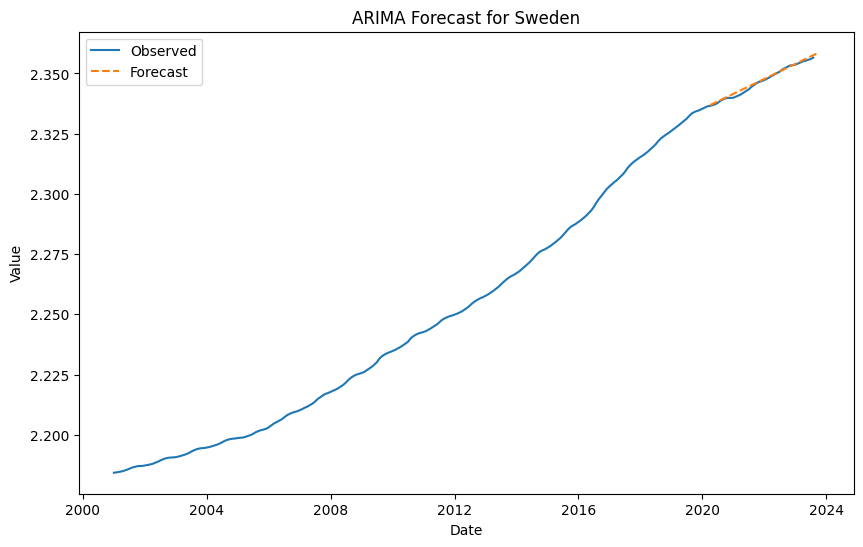

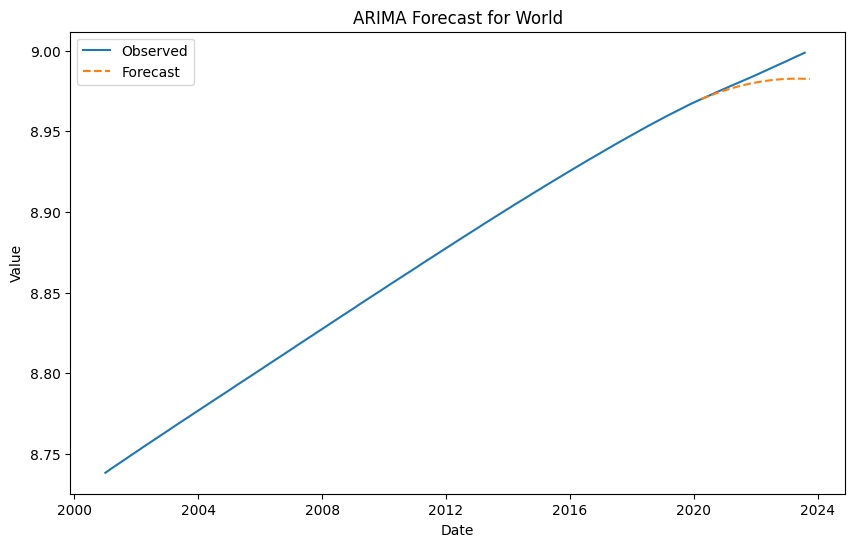

In [137]:

arima_models, pop_gap_arima, errors_arima = ARIMA_forecast(data, best_pacf_acf_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label='Observed' )
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--' )

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

###Values above 0 represent a positive shock and values below 0 represent a negative shock

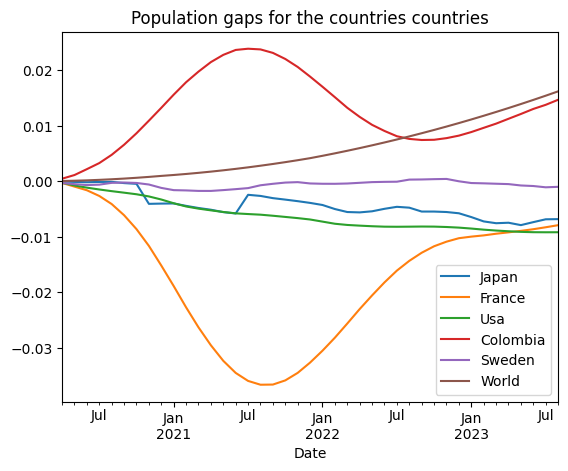

In [138]:
pop_gap_arima.plot()
plt.title('Population gaps for the countries countries')
plt.show()

In [139]:
errors_arima

Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  2.405608e-05  0.004905  0.004343  0.089950  0.004343
1    France  4.379889e-04  0.020928  0.017589  0.420416  0.017589
2       Usa  4.501930e-05  0.006710  0.006144  0.105746  0.006144
3  Colombia  2.034433e-04  0.014263  0.012677  0.323734 -0.012677
4    Sweden  6.638369e-07  0.000815  0.000648  0.027624  0.000580
5     World  5.532921e-05  0.007438  0.005609  0.062376 -0.005609

#Using A SARIMA Model to integrate the seasonality component
We use multithreading to make parameter finding converge faster.

In [ ]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import itertools
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def evaluate_model(column, data, p, d, q, seasonal_params):
    try:
        log_transformed_column = data[column].apply(lambda x: math.log(x) if x > 0 else 0)
        model = sm.tsa.SARIMAX(log_transformed_column,
                               order=(p, d, q),
                               seasonal_order=seasonal_params)
        result = model.fit(disp=False)
        aic = result.aic

        if not math.isinf(result.zvalues.mean()):
            return aic, seasonal_params
    except Exception as e:
        return float("inf"), None

def find_best_seasonal_params(data, orders):
    P_values = range(0, 2)
    D_values = range(0, 3)
    Q_values = range(0, 2)
    m_values = [12]

    seasonal_param_combinations = list(itertools.product(P_values, D_values, Q_values, m_values))

    best_params_dict = {}

    for column in data.columns:
        p, d, q = orders[column]
        best_aic = float("inf")
        best_params = None

        futures = []
        with ThreadPoolExecutor() as executor:
            for seasonal_params in seasonal_param_combinations:
                futures.append(executor.submit(evaluate_model, column, data, p, d, q, seasonal_params))

            for future in tqdm(as_completed(futures), total=len(futures), desc=f"Column: {column}"):
                aic, params = future.result()
                if aic < best_aic:
                    best_aic = aic
                    best_params = params

        best_params_dict[column] = best_params

    for column, params in best_params_dict.items():
        print(f"Column: {column}, Best Seasonal Parameters: {params}")

    return best_params_dict

# Example usage:
# Assuming you have a DataFrame 'data' and a dictionary 'orders'
best_seasonal_params = find_best_seasonal_params(data, best_pacf_acf_orders)
print("\nBest Seasonal Parameters for Each Column:")
print(best_seasonal_params)


In [68]:
seasonal_params={'Japan': (1, 0, 0, 12), 'France': (0, 1, 0, 12), 'Usa': (1, 0, 0, 12), 'Colombia': (1, 0, 0, 12), 'Sweden': (1, 0, 0, 12), 'World': (1, 0, 0, 12)}

def combine_sarima_params(pacf_acf_orders, seasonal_params):
    combined_params = {}
    for country in pacf_acf_orders.keys():
        # Ensure the country is present in both dictionaries
        if country in seasonal_params:
            combined_params[country] = pacf_acf_orders[country] + seasonal_params[country]
        else:
            print(f"Missing seasonal parameters for {country}")
    return combined_params

combined_sarima_params=combine_sarima_params(best_pacf_acf_orders,seasonal_params)

In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def sarima_forecast(data, best_params_dict, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    sarima_models = {}
    training = pd.DataFrame()
    testing = pd.DataFrame()
    predictions = pd.DataFrame()
    population_gap = pd.DataFrame()
    errors = pd.DataFrame(columns=['Country', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Bias'])

    for column, params in best_params_dict.items():
        series = data[column]

        order, seasonal_order = params[:3], params[3:]

        # Split the data into training and testing based on the cutoff date
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        training[column] = training_data
        testing[column] = testing_data

        # Fit a SARIMA model
        model = SARIMAX(training_data, order=order, seasonal_order=seasonal_order)
        sarima_model = model.fit(disp=False)
        sarima_models[column] = sarima_model

        # Generate predictions
        forecast_steps = len(testing_data)
        forecasted_values = sarima_model.get_forecast(steps=forecast_steps).predicted_mean
        predictions[column] = forecasted_values

        # Calculate population gap
        pop_gap = testing_data - forecasted_values
        population_gap[column] = pop_gap

        # Calculate error metrics
        mse = mean_squared_error(testing_data, forecasted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(testing_data, forecasted_values)
        mape = np.mean(np.abs((testing_data - forecasted_values) / testing_data)) * 100
        bias = np.mean(forecasted_values - testing_data)

        # Append error metrics to DataFrame
        errors = errors.append({
            'Country': column,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'Bias': bias
        }, ignore_index=True)

    return sarima_models, training, testing, predictions, population_gap, errors

# Example usage

sarima_models, training, testing, predictions, population_gap_sarima, errors_sarima = sarima_forecast(data, combined_sarima_params)


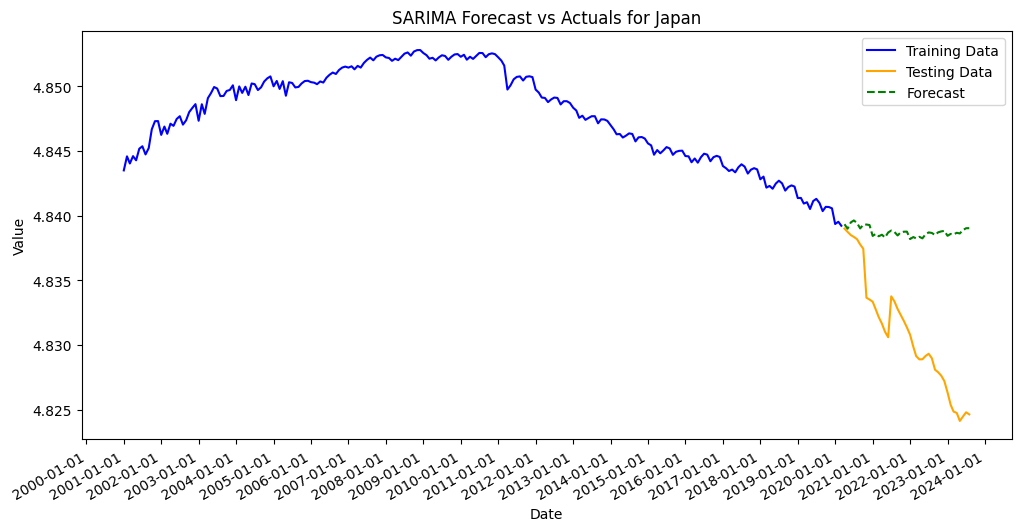

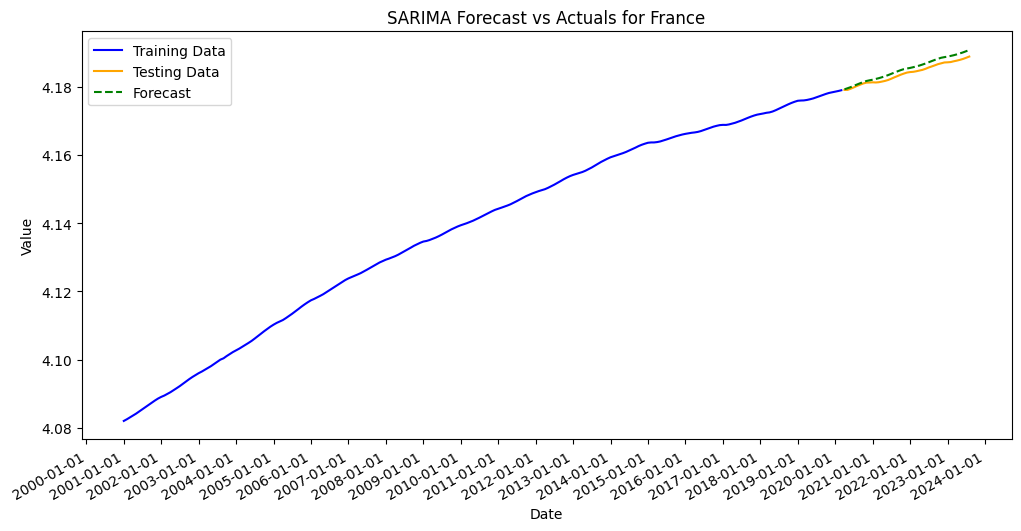

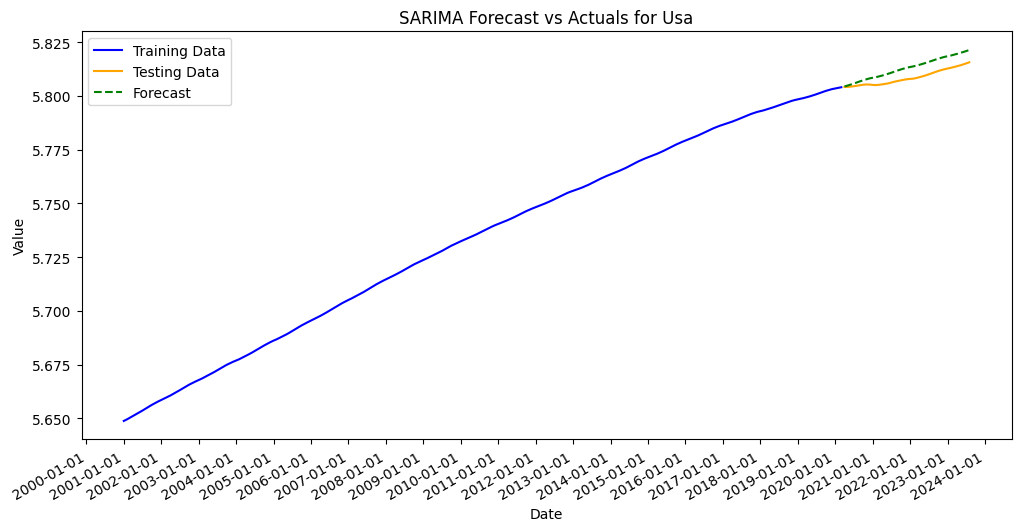

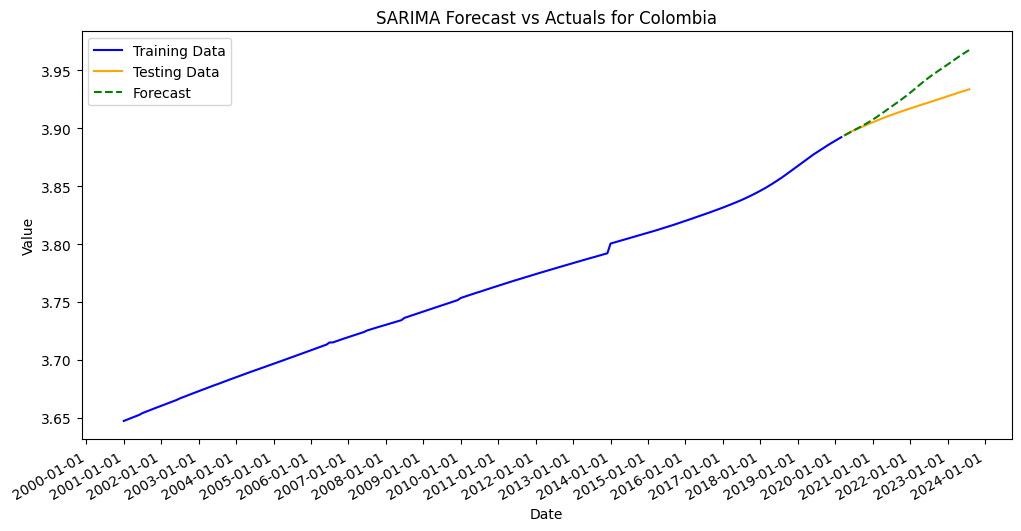

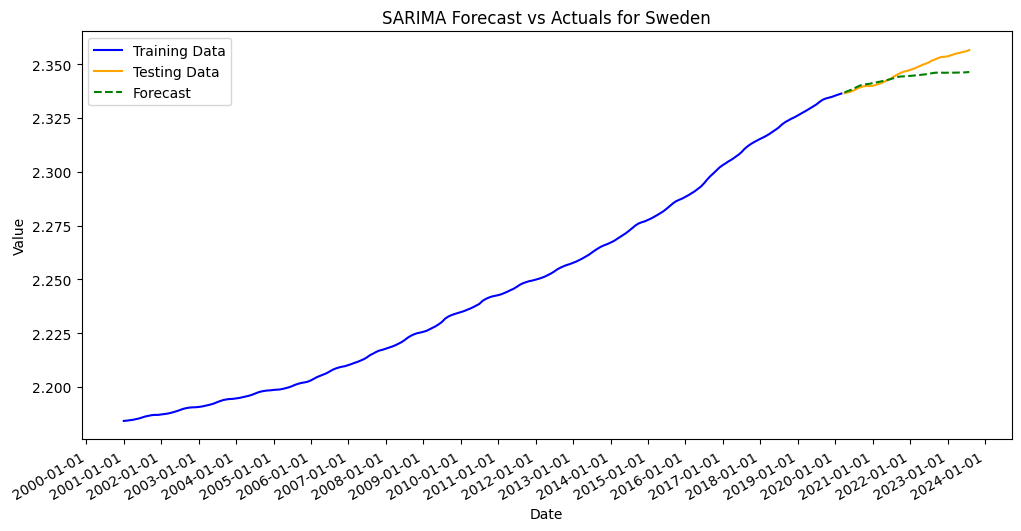

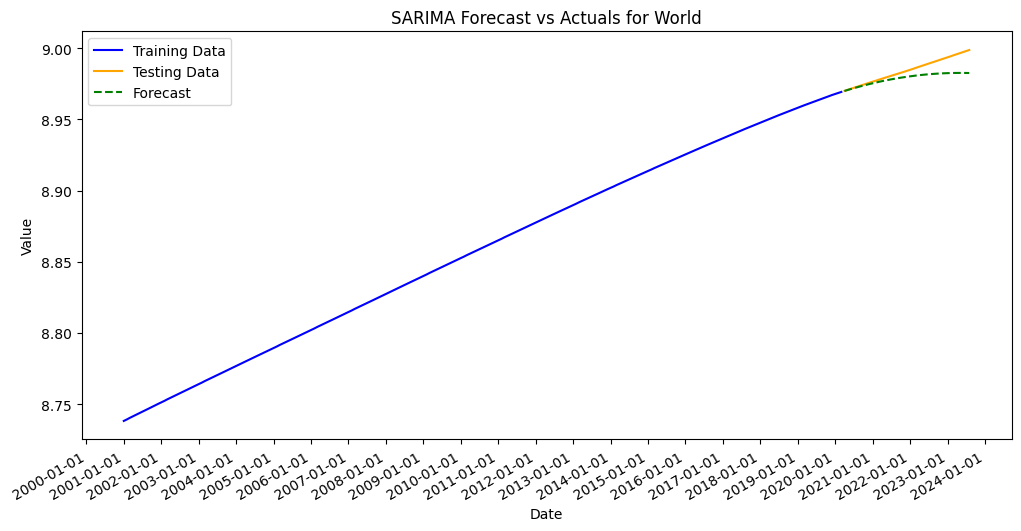

In [143]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_sarima_forecast(data, sarima_models, training, testing, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)
    for column, sarima_model in sarima_models.items():
        # Forecast future values
        forecast_steps = len(data[column]) - len(data[column][data.index <= cutoff_date])
        predictions = sarima_model.get_forecast(steps=forecast_steps)
        predicted_values = predictions.predicted_mean

        # Plotting
        plt.figure(figsize=(12, 6))

        # Plot training data
        plt.plot(training.index, training[column], label='Training Data', color='blue')

        # Plot testing data
        plt.plot(testing.index, testing[column], label='Testing Data', color='orange')

        # Plot forecasted data
        plt.plot(predicted_values.index, predicted_values, label='Forecast', linestyle='--', color='green')

        # Formatting plot
        plt.title(f'SARIMA Forecast vs Actuals for {column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()

        # Improve date formatting
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
        plt.gcf().autofmt_xdate()  # Rotate date labels

        plt.show()

# Example usage:
# Assuming sarima_models, training, testing data are available from the sarima_forecast function
plot_sarima_forecast(data, sarima_models, training, testing)


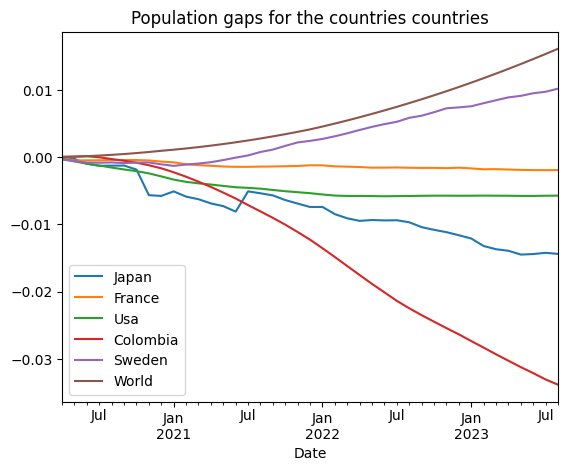

In [144]:
population_gap_sarima.plot()
plt.title('Population gaps for the countries countries')
plt.show()

In [145]:
errors_sarima

Country       MSE      RMSE       MAE      MAPE      Bias
0     Japan  0.000079  0.008895  0.007847  0.162508  0.007847
1    France  0.000002  0.001359  0.001264  0.030208  0.001264
2       Usa  0.000023  0.004758  0.004439  0.076416  0.004439
3  Colombia  0.000329  0.018128  0.014092  0.359086  0.014078
4    Sweden  0.000025  0.004982  0.003736  0.158869 -0.003181
5     World  0.000055  0.007438  0.005609  0.062376 -0.005609

#  Hybrid ARIMA

Test MSE for Japan: 0.000


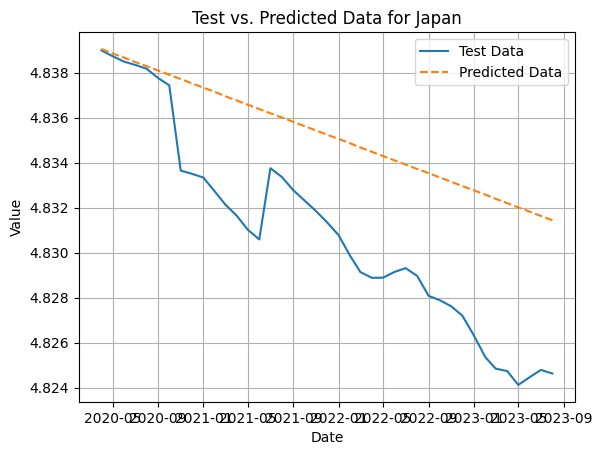

Test MSE for France: 0.003


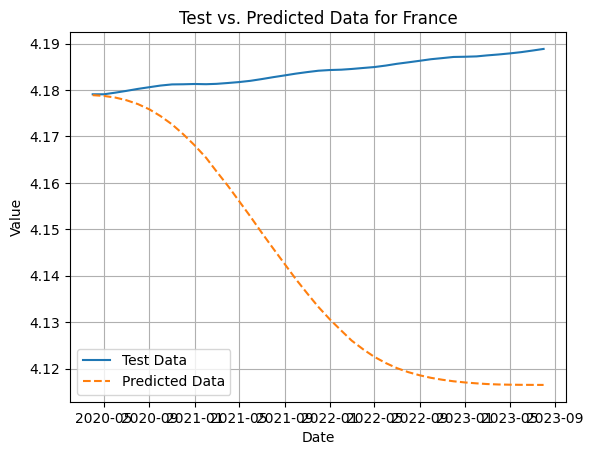

Test MSE for Usa: 0.000


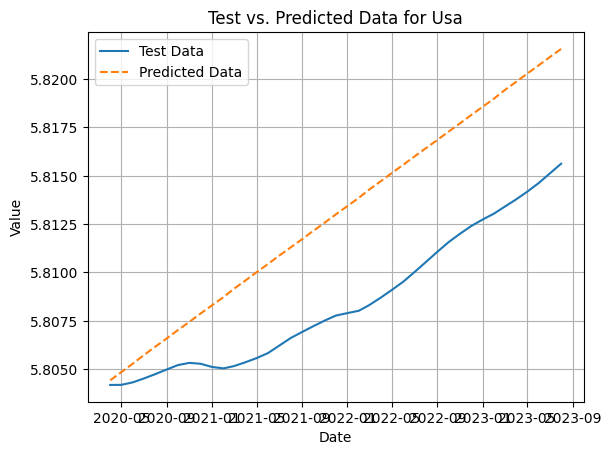

Test MSE for Colombia: 0.000


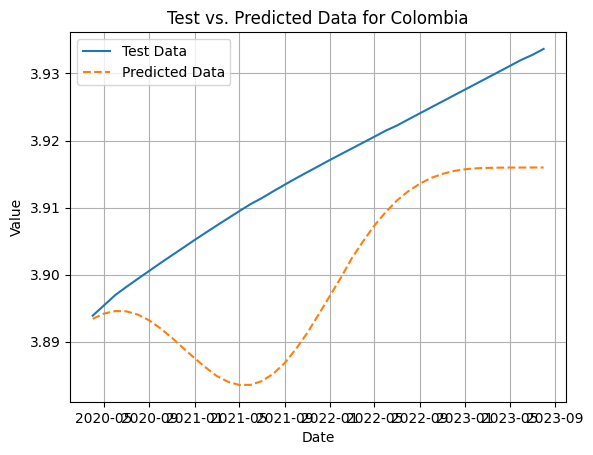

Test MSE for Sweden: 0.000


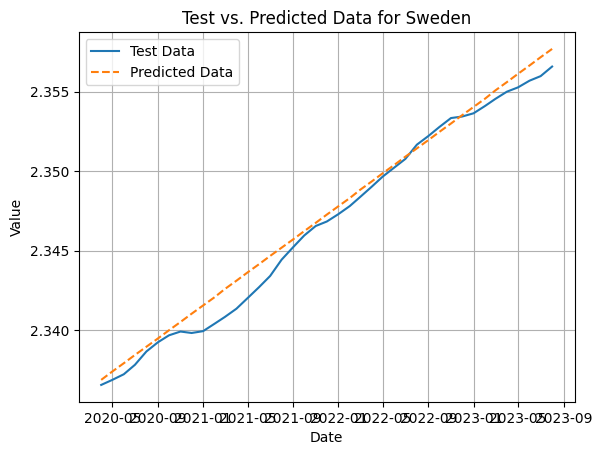

Test MSE for World: 0.000


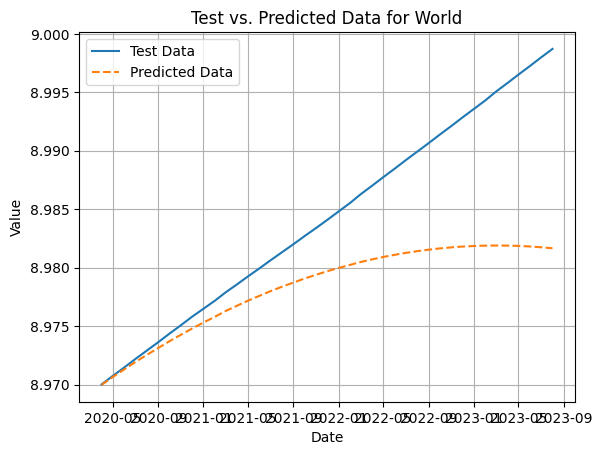

Test Errors:
               Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2020-04-01 -0.000068  0.000189 -0.000237  0.000476 -0.000318  0.000041
2020-05-01 -0.000120  0.000348 -0.000659  0.001208 -0.000526  0.000095
2020-06-01 -0.000178  0.001058 -0.000970  0.002387 -0.000694  0.000163
2020-07-01 -0.000129  0.002010 -0.001209  0.003647 -0.000619  0.000258
2020-08-01 -0.000114  0.003273 -0.001420  0.005345 -0.000298  0.000369
2020-09-01 -0.000335  0.004773 -0.001611  0.007406 -0.000239  0.000498
2020-10-01 -0.000469  0.006573 -0.001813  0.009745 -0.000319  0.000648
2020-11-01 -0.004068  0.008595 -0.002125  0.012306 -0.000600  0.000817
2020-12-01 -0.004021  0.010727 -0.002599  0.014930 -0.001211  0.001006
2021-01-01 -0.003998  0.013194 -0.003191  0.017615 -0.001615  0.001181
2021-02-01 -0.004429  0.015831 -0.003690  0.020168 -0.001667  0.001376
2021-03-01 -0.004812  0.018836 -0.004000  0.022373 -0.001757  0.

In [153]:
def hybrid_arima(data ):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)  # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Find the best order

        # Fit the ARIMA model
        model = ARIMA(train, order=best_pacf_acf_orders.get(column))
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))

        # Calculate errors
        error_list = np.expm1(test) - np.expm1(predictions)
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store the test errors
        test_errors[column] = error_list

        # Store the training errors
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)

        # Store the predictions
        predictions_df[column] = np.expm1(predictions)

        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: %.3f' % test_error)
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set

# Example usage:
# Assuming 'data' is a DataFrame containing multiple columns of time series data
# Replace 'data' with your actual dataset

test_errors_arima_ann, training_errors_arima_ann, predictions_df_arima_ann,test_arima_ann = hybrid_arima(data)

# Access the DataFrames with test errors, training errors, and predictions
print("Test Errors:")
print(test_errors_arima_ann)

print("\nTraining Errors:")
print(training_errors_arima_ann)

print("\nPredictions:")
print(predictions_df_arima_ann)


In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd
#test_errors_arima_ann, training_errors_arima_ann, predictions_df_arima_ann,test_arima_ann
test_pred_arima_ann = pd.DataFrame()

# Define the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over columns (countries) in training_errors_arima
for i in training_errors_arima_ann.columns:
    train_resid = training_errors_arima_ann[i].values.reshape(-1, 1)
    test_resid = test_errors_arima_ann[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Use the same model for all countries
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred_arima_ann[i] = test_predictions.flatten()


2/2 [==============================] - 0s 9ms/step


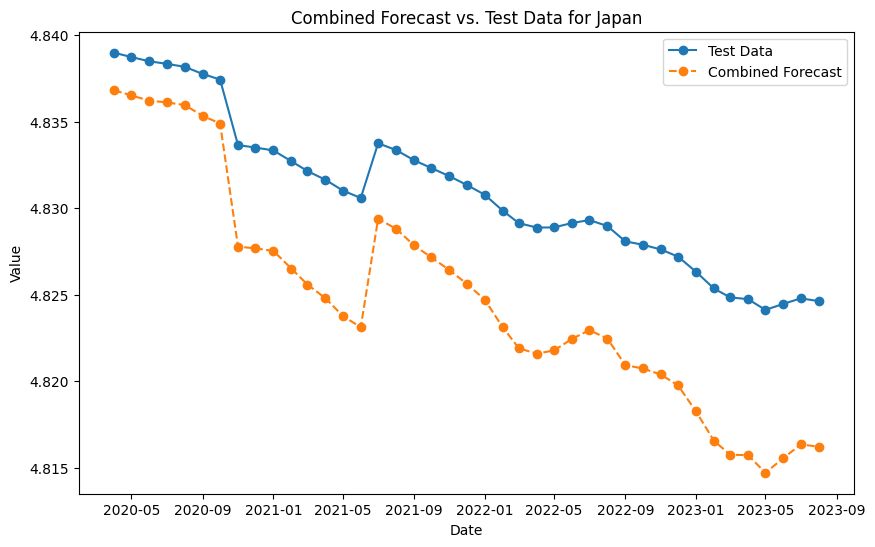

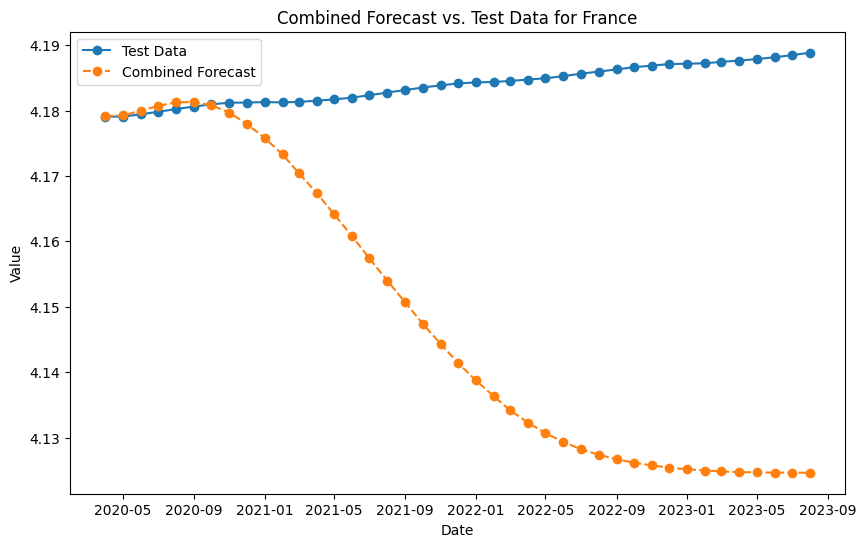

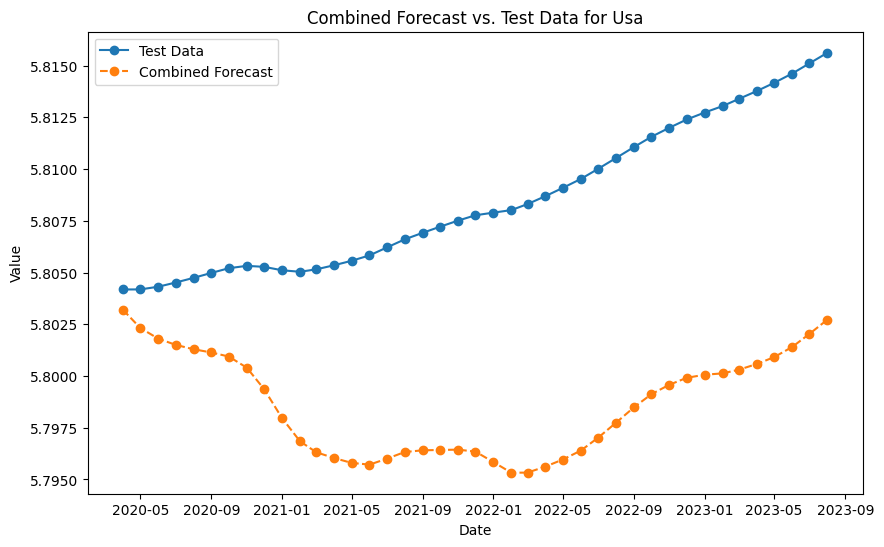

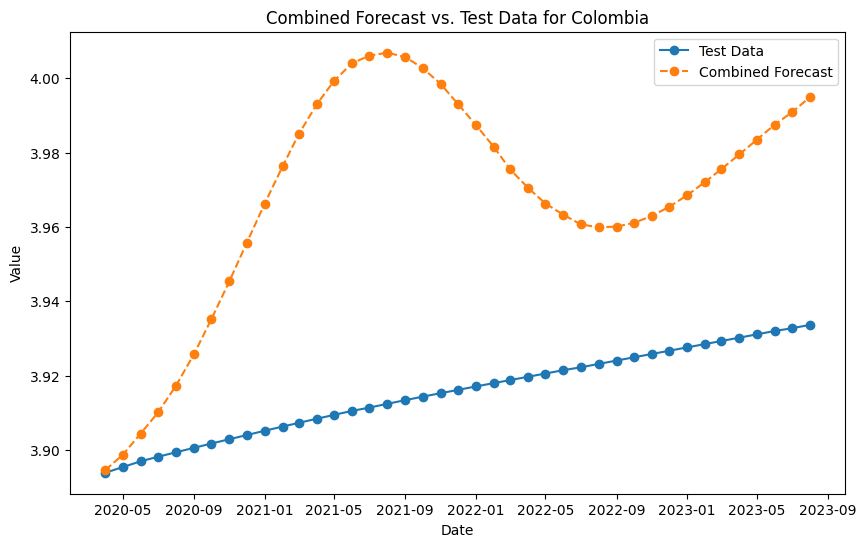

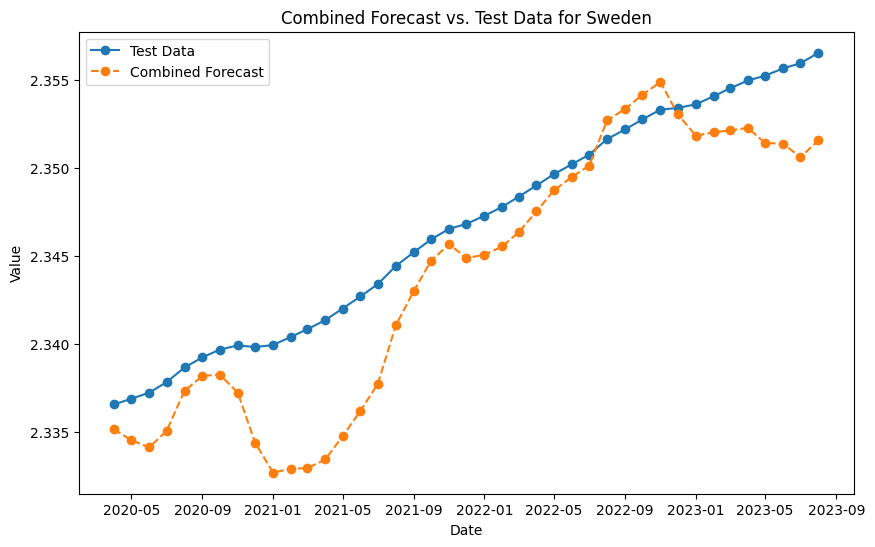

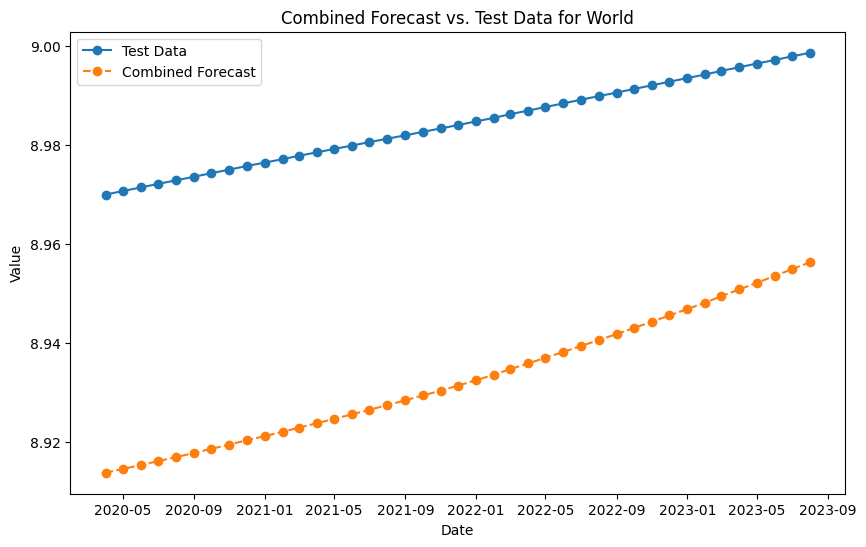

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test_s' is your observed test data and 'predictions_df', 'test_pred_arima_ann' are your predictions
combined_forecasts_hybrid_ann = pd.DataFrame(index=test_arima_ann.index)
pop_gap_hybrid_ann = pd.DataFrame(index=test_arima_ann.index)

for column in test_pred_arima_ann.columns:
    final_forecasts = predictions_df_arima[column].values + test_pred_arima_ann[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_arima_ann.index, test_arima_ann[column], label='Test Data', marker='o')
    plt.plot(test_arima_ann.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts_hybrid_ann[column] = final_forecasts

    # Calculate and store population gaps
    pop_gap_hybrid_ann[column] = test_arima_ann[column] - final_forecasts

# Display the combined forecasts DataFrame



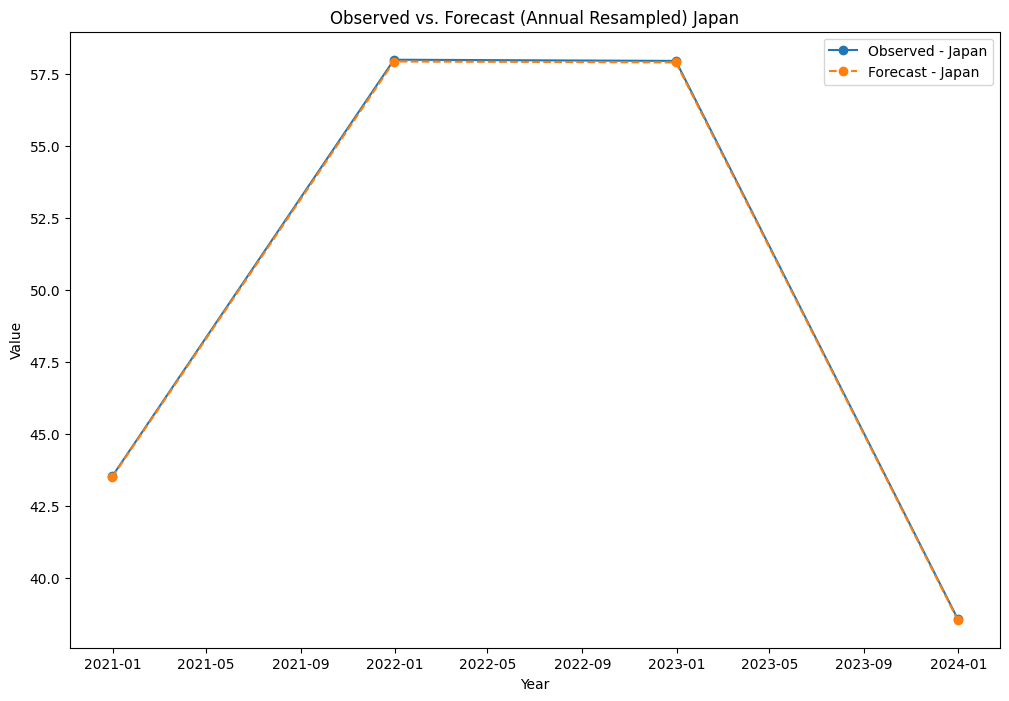

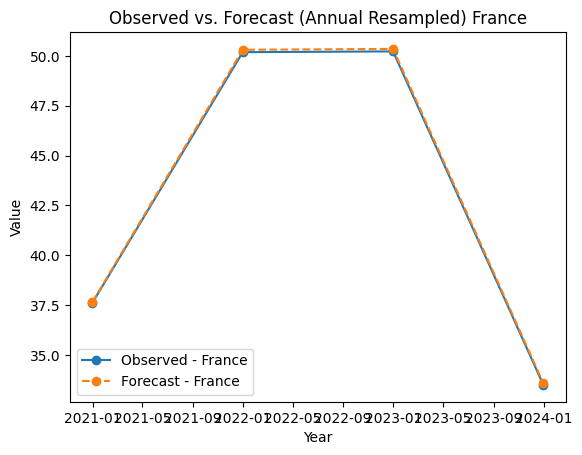

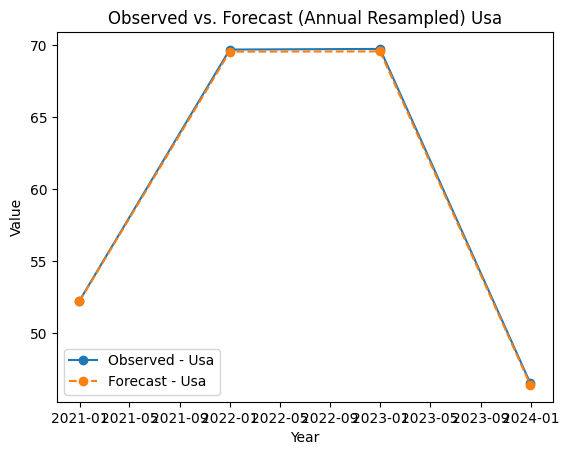

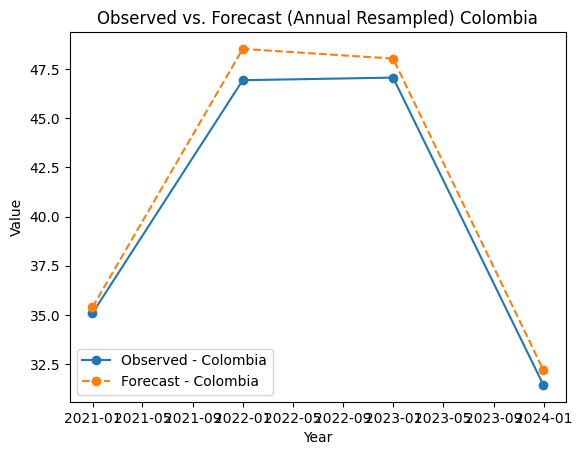

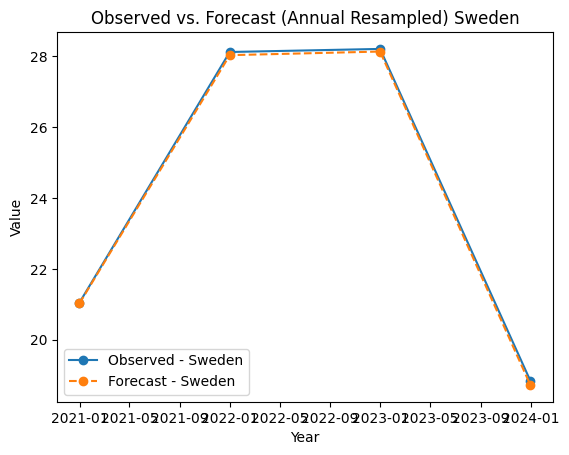

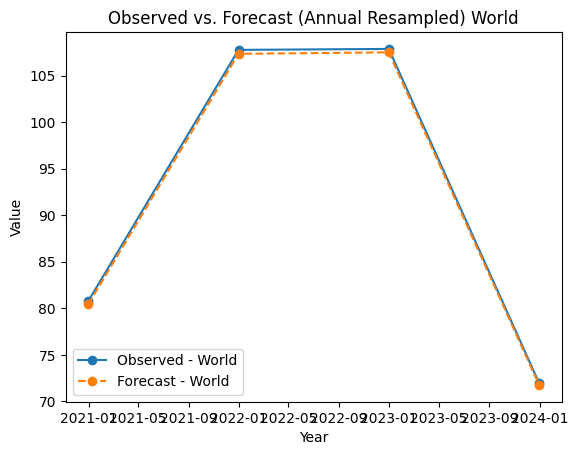

In [159]:
# Assuming 'test_s' is your observed test data
# Resample the observed test data to annual frequency
test_s_annual = test_s.resample('A').sum()
combined_forecasts_annual = combined_forecasts.resample('A').sum()

# Plot the observed vs. forecast values for each country
plt.figure(figsize=(12, 8))
for column in combined_forecasts_annual.columns:
    plt.plot(test_s_annual.index, test_s_annual[column], label=f'Observed - {column}', marker='o')
    plt.plot(combined_forecasts_annual.index, combined_forecasts_annual[column], label=f'Forecast - {column}', linestyle='--', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Observed vs. Forecast (Annual Resampled) {column}')
    plt.legend()
    plt.show()


<Axes: xlabel='Date'>

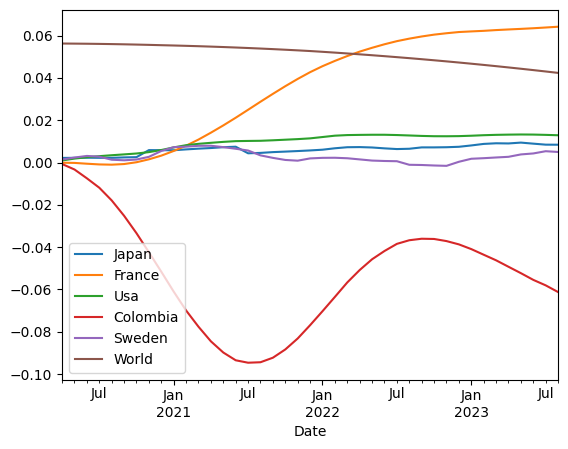

In [160]:
pop_gap_hybrid_ann.plot()

In [162]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_arima_ann' is the actual data and 'combined_forecasts_hybrid_ann' contains the forecasts
accuracy_metrics_df_hybrid_ann = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts_hybrid_ann.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_arima_ann[column], combined_forecasts_hybrid_ann[column])
    accuracy_metrics_df_hybrid_ann = accuracy_metrics_df_hybrid_ann.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df_hybrid_ann)


    Country       MSE       MAE      RMSE      MAPE      Bias
0     Japan  0.000042  0.006129  0.006482  0.126917 -0.006129
1    France  0.001888  0.035606  0.043450  0.850620 -0.035438
2       Usa  0.000112  0.009890  0.010593  0.170236 -0.009890
3  Colombia  0.003424  0.052669  0.058514  1.344790  0.052669
4    Sweden  0.000014  0.003037  0.003772  0.129469 -0.002783
5     World  0.002666  0.051458  0.051630  0.572800 -0.051458


#SARIMA-LSTM MODEL


Test MSE for Japan: 0.000


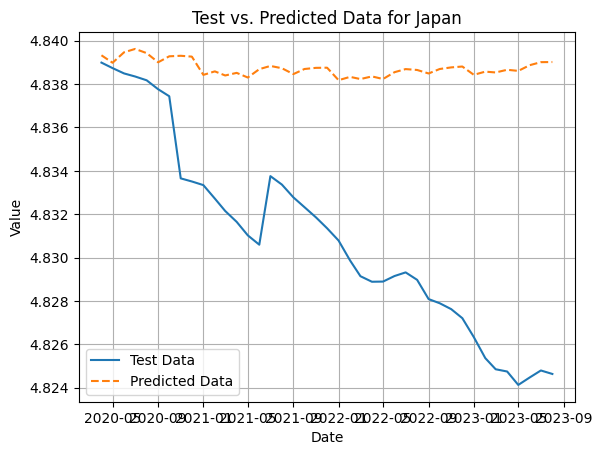

Test MSE for France: 0.000


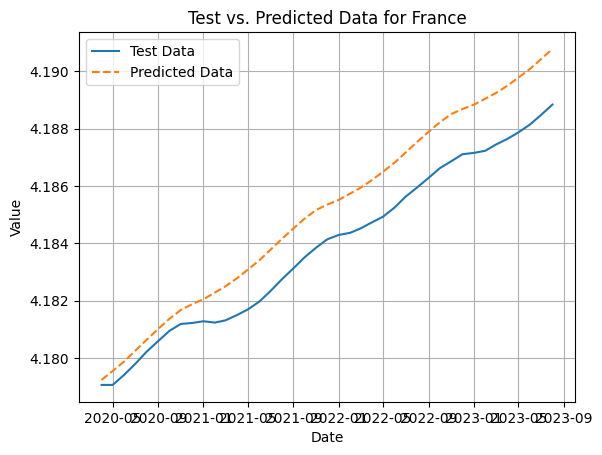

Test MSE for Usa: 0.000


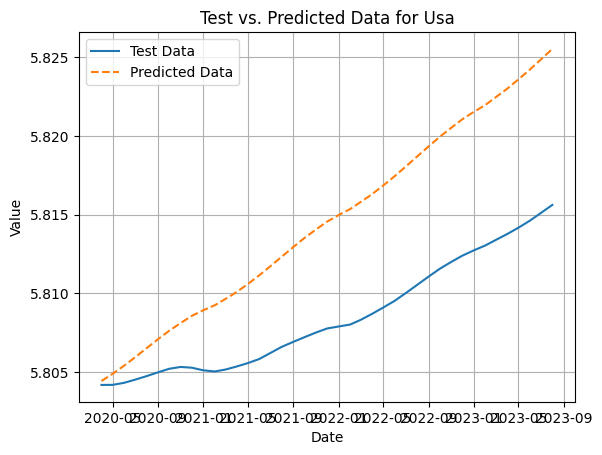

Test MSE for Colombia: 0.000


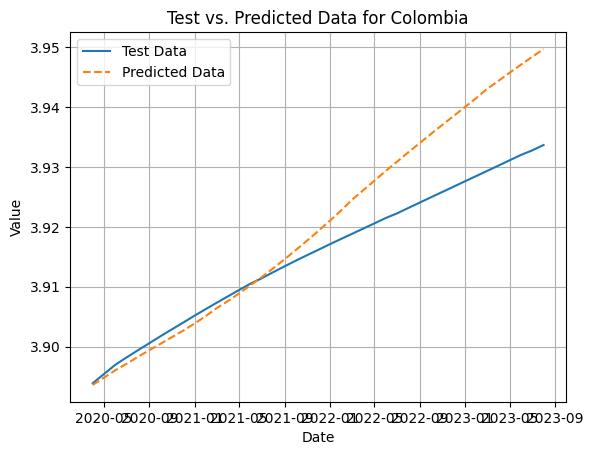

Test MSE for Sweden: 0.000


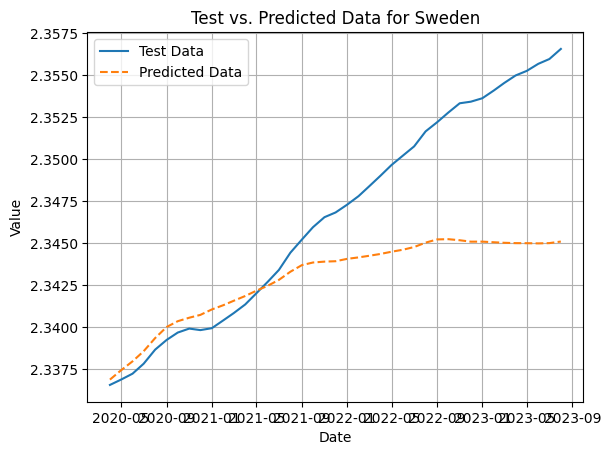

Test MSE for World: 0.000


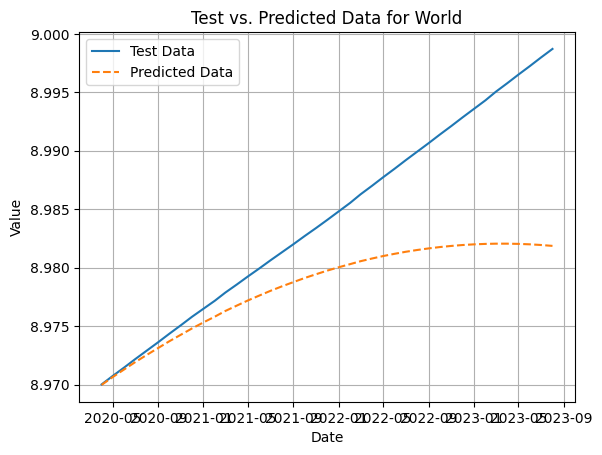

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def hybrid_sarima(data, best_params_dict):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)  # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Get the best order for the current time series
        best_order = best_params_dict[column][:3]
        best_seasonal_order = best_params_dict[column][3:]

        # Fit the SARIMA model
        model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))
        predictions.index = test.index  # Align the index of predictions with the test data

        # Calculate errors
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store errors and predictions
        test_errors[column] = np.expm1(test) - np.expm1(predictions)
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)
        predictions_df[column] = np.expm1(predictions)
        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: {test_error:.3f}')
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set


test_errors_sarima_lstm, training_errors_sarima_lstm, predictions_df_sarima_lstm, test_set_sarima_lstm = hybrid_sarima(data, combined_sarima_params)


In [164]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd
#test_errors_sarima_lstm, training_errors_sarima_lstm, predictions_df_sarima_lstm, test_set_sarima_lstm
# Assuming you have training_errors and test_errors DataFrames as before
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize an empty DataFrame to store predictions
predictions_df_sarima_lstm = pd.DataFrame()

# Iterate over columns (countries) in training_errors_sarima_lstm
for i in training_errors_sarima_lstm.columns:
    train_resid = training_errors_sarima_lstm[i].values.reshape(-1, 1)
    test_resid = test_errors_sarima_lstm[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    train_resid = train_resid.reshape((train_resid.shape[0], 1, train_resid.shape[1]))
    test_resid = test_resid.reshape((test_resid.shape[0], 1, test_resid.shape[1]))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(1, 1)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    predictions_df_sarima_lstm[i] = test_predictions.flatten()

# Output DataFrame with predictions
print(predictions_df_sarima_lstm)


2/2 [==============================] - 0s 7ms/step
       Japan    France       Usa  Colombia    Sweden     World
0   0.004421  0.005076  0.000036  0.002696  0.000795 -0.018691
1   0.004515  0.004708 -0.000392  0.002930  0.000511 -0.018654
2   0.003764  0.004732 -0.000755  0.003169  0.000296 -0.018606
3   0.003456  0.004744 -0.001071  0.003275  0.000286 -0.018541
4   0.003476  0.004792 -0.001404  0.003311  0.000351 -0.018463
5   0.003488  0.004782 -0.001716  0.003364  0.000253 -0.018374
6   0.002868  0.004785 -0.002007  0.003429  0.000365 -0.018271
7  -0.001068  0.004707 -0.002363  0.003464  0.000401 -0.018153
8  -0.001175  0.004511 -0.002833  0.003494  0.000090 -0.018023
9  -0.000478  0.004375 -0.003328  0.003467 -0.000159 -0.017902
10 -0.001286  0.004045 -0.003694  0.003358  0.000096 -0.017768
11 -0.001684  0.003882 -0.003950  0.003162  0.000295 -0.017619
12 -0.002326  0.003769 -0.004189  0.003069  0.000571 -0.017459
13 -0.002748  0.003641 -0.004463  0.002919  0.000989 -0.017284
14 -

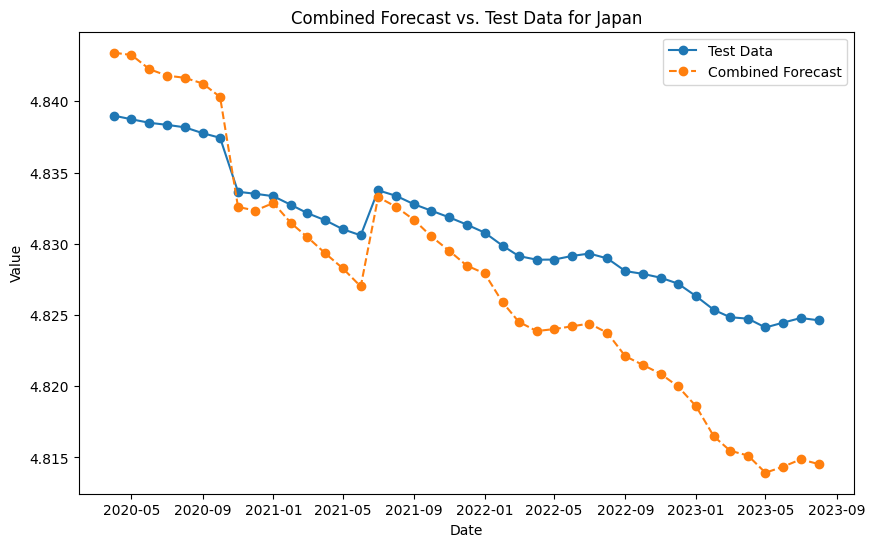

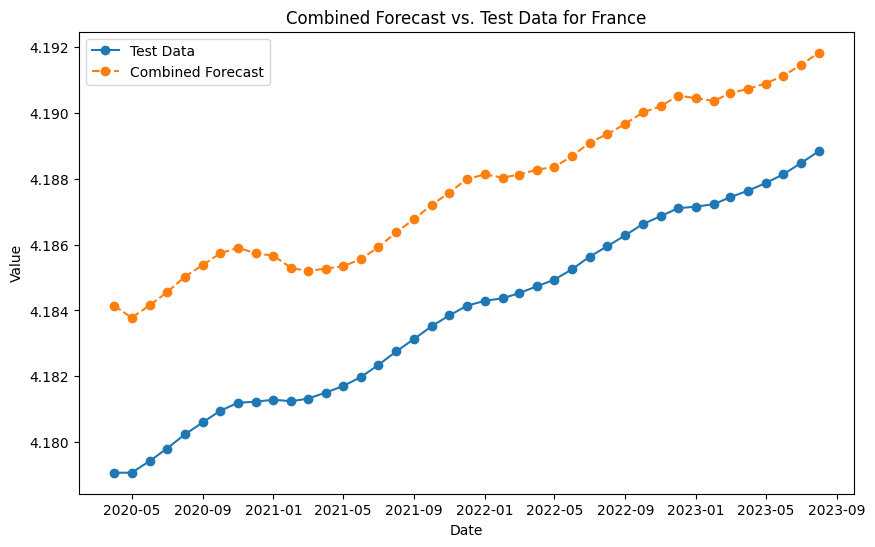

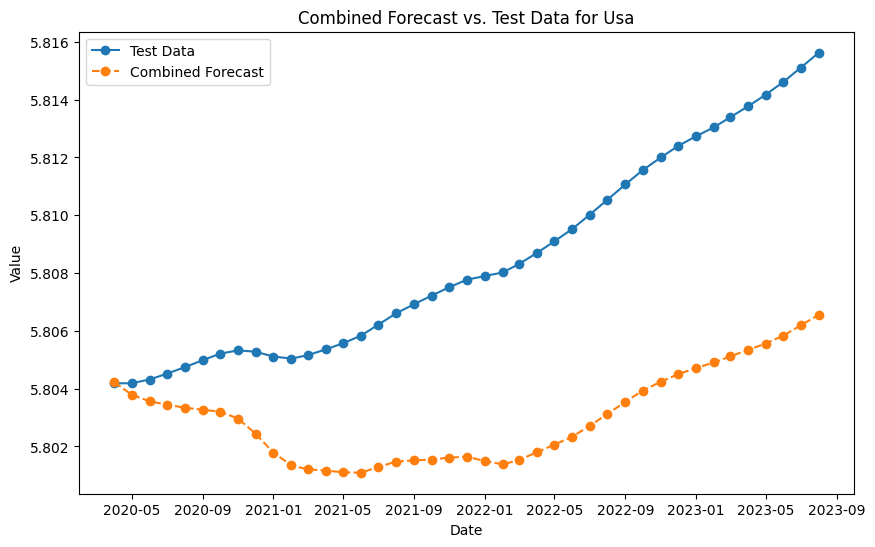

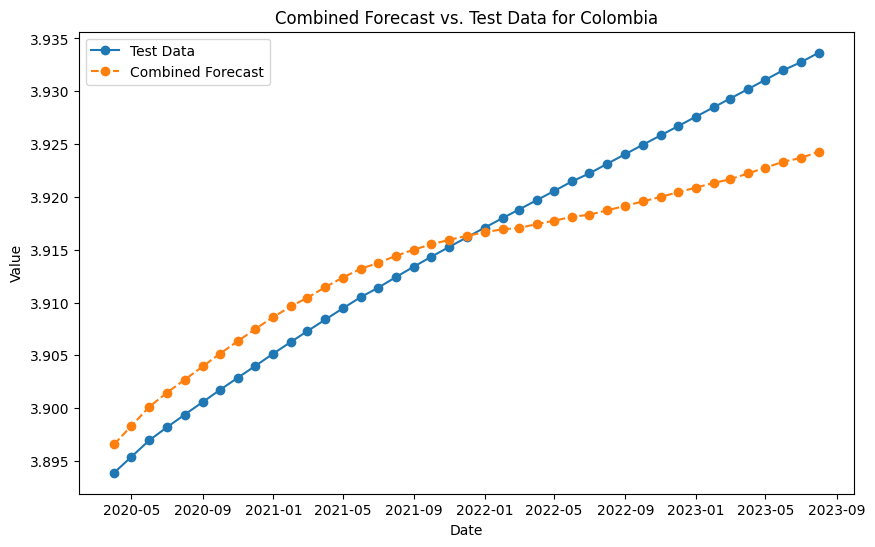

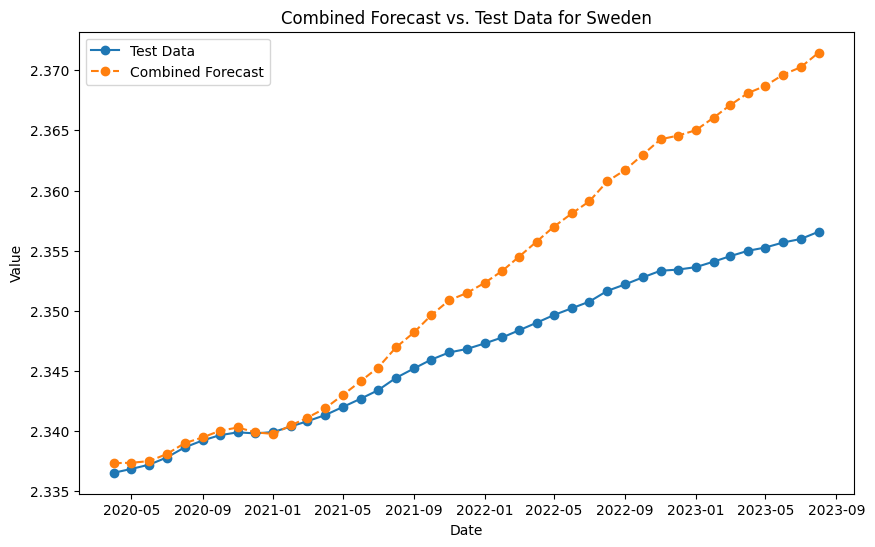

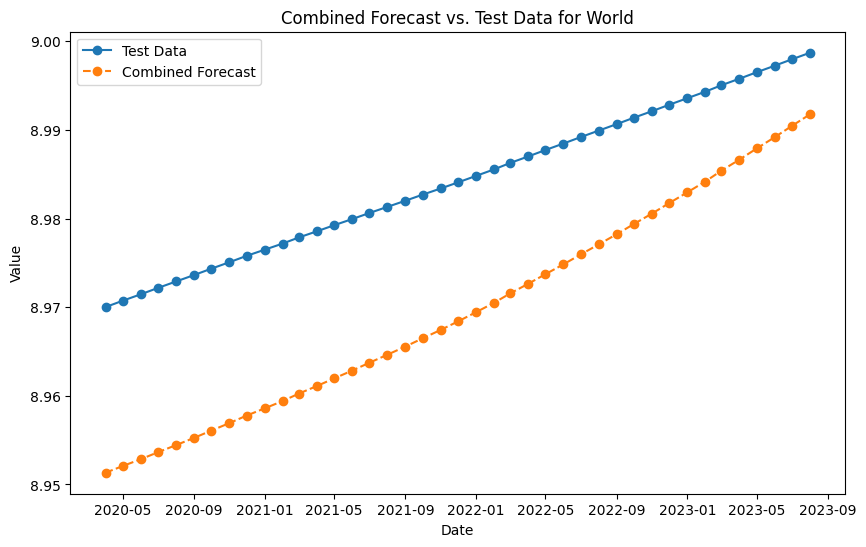

Combined Forecasts:
               Japan    France       Usa  Colombia    Sweden     World
Date                                                                  
2020-04-01  4.843414  4.184145  5.804219  3.896585  2.337342  8.951318
2020-05-01  4.843254  4.183777  5.803794  3.898334  2.337374  8.952078
2020-06-01  4.842258  4.184153  5.803561  3.900138  2.337513  8.952849
2020-07-01  4.841807  4.184547  5.803446  3.901457  2.338097  8.953637
2020-08-01  4.841653  4.185023  5.803340  3.902703  2.339001  8.954438
2020-09-01  4.841253  4.185381  5.803268  3.903946  2.339481  8.955251
2020-10-01  4.840309  4.185735  5.803203  3.905165  2.340032  8.956077
2020-11-01  4.832584  4.185902  5.802962  3.906359  2.340306  8.956917
2020-12-01  4.832333  4.185736  5.802443  3.907499  2.339903  8.957771
2021-01-01  4.832863  4.185661  5.801783  3.908636  2.339769  8.958582
2021-02-01  4.831434  4.185286  5.801345  3.909652  2.340492  8.959407
2021-03-01  4.830462  4.185199  5.801206  3.910462  2.341

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test_s' is your observed test data and 'predictions_df', 'test_pred' are your predictions
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test_set_sarima_lstm' is your observed test data and 'predictions_df_sarima_lstm' contains the forecasts
combined_forecasts_sarimalstm = pd.DataFrame(index=test_set_sarima_lstm.index)
pop_gap_sarimalstm = pd.DataFrame(index=test_set_sarima_lstm.index)

for column in predictions_df_sarima_lstm.columns:
    # Combine SARIMA and LSTM forecasts
    final_forecasts = predictions_df_sarima_lstm[column].values + test_set_sarima_lstm[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_set_sarima_lstm.index, test_set_sarima_lstm[column], label='Test Data', marker='o')
    plt.plot(test_set_sarima_lstm.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts_sarimalstm[column] = final_forecasts

    # Calculate and store population gaps
    pop_gap_sarimalstm[column] = test_set_sarima_lstm[column] - final_forecasts

# Display the combined forecasts DataFrame
print("Combined Forecasts:")
print(combined_forecasts_sarimalstm)

# Display the population gap DataFrame
print("\nPopulation Gap:")
print(pop_gap_sarimalstm)


<Axes: xlabel='Date'>

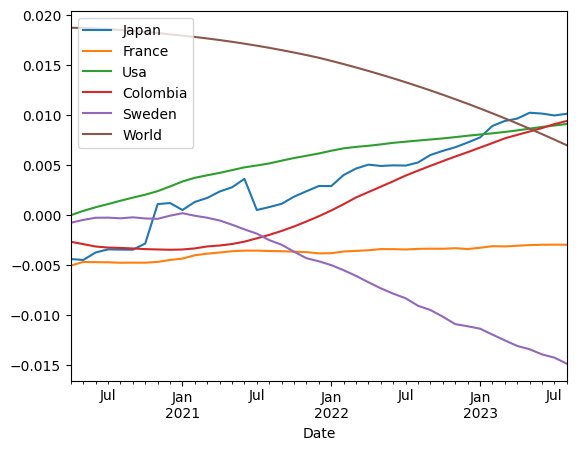

In [166]:
pop_gap_sarimalstm.plot()

In [124]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_s' is the actual data and 'combined_forecasts' contains the forecasts
accuracy_metrics_df = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_s[column], combined_forecasts[column])
    accuracy_metrics_df = accuracy_metrics_df.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df)


    Country           MSE       MAE      RMSE      MAPE      Bias
0     Japan  2.473718e-07  0.000426  0.000497  0.008820  0.000337
1    France  6.782801e-07  0.000822  0.000824  0.019651  0.000822
2       Usa  2.966099e-05  0.005434  0.005446  0.093549  0.005434
3  Colombia  1.723746e-05  0.003307  0.004152  0.084295  0.003307
4    Sweden  7.128844e-07  0.000701  0.000844  0.029800  0.000701
5     World  9.955776e-04  0.031519  0.031553  0.350815 -0.031519


In [167]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Assuming 'test_set_sarima_lstm' is the actual data and 'combined_forecasts_sarimalstm' contains the forecasts
accuracy_metrics_df_sarimalstm = pd.DataFrame(columns=['Country', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

for column in combined_forecasts_sarimalstm.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_set_sarima_lstm[column], combined_forecasts_sarimalstm[column])
    accuracy_metrics_df_sarimalstm = accuracy_metrics_df_sarimalstm.append({
        'Country': column,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Bias': bias
    }, ignore_index=True)

# Display the accuracy metrics DataFrame
print(accuracy_metrics_df_sarimalstm)


    Country       MSE       MAE      RMSE      MAPE      Bias
0     Japan  0.000030  0.004596  0.005456  0.095174 -0.003328
1    France  0.000015  0.003776  0.003823  0.090271  0.003776
2       Usa  0.000037  0.005484  0.006085  0.094386 -0.005482
3  Colombia  0.000022  0.003975  0.004657  0.101417 -0.001257
4    Sweden  0.000057  0.005618  0.007530  0.238867  0.005611
5     World  0.000227  0.014628  0.015055  0.162852 -0.014628


#Model comparison

In [181]:
import numpy as np
import pandas as pd

# Function to calculate the mean of the exponential of the population gaps
def calculate_mean_exp_population_gap(pop_gap_df):
    mean_exp_gaps = {}
    for country in pop_gap_df.columns:
        mean_exp_gaps[country] = ((pop_gap_df[country]).mean())
    return mean_exp_gaps

# Assuming you have these DataFrames already defined:
# pop_gap_ar_1, pop_gap_arima, population_gap_sarima, pop_gap_hybrid_ann, pop_gap_sarimalstm

# Calculate mean of exponential of population gaps for each model
mean_exp_pop_gap_ar_1 = calculate_mean_exp_population_gap(pop_gap_ar_1)
mean_exp_pop_gap_arima = calculate_mean_exp_population_gap(pop_gap_arima)
mean_exp_population_gap_sarima = calculate_mean_exp_population_gap(population_gap_sarima)
mean_exp_pop_gap_hybrid_ann = calculate_mean_exp_population_gap(pop_gap_hybrid_ann)
mean_exp_pop_gap_sarimalstm = calculate_mean_exp_population_gap(pop_gap_sarimalstm)

# Printing out the results
print("Mean Exp Population Gap AR(1):", mean_exp_pop_gap_ar_1)
print("Mean Exp Population Gap ARIMA:", mean_exp_pop_gap_arima)
print("Mean Exp Population Gap SARIMA:", mean_exp_population_gap_sarima)
print("Mean Exp Population Gap Hybrid ANN:", mean_exp_pop_gap_hybrid_ann)
print("Mean Exp Population Gap SARIMA-LSTM:", mean_exp_pop_gap_sarimalstm)


Mean Exp Population Gap AR(1): {'Japan': -0.005946780508474699, 'France': 0.008373609578884845, 'Usa': -0.006521104625026999, 'Colombia': 0.01731403306998033, 'Sweden': 2.53800687077539e-05, 'World': -0.00033465003426574473}
Mean Exp Population Gap ARIMA: {'Japan': -0.004343426374021874, 'France': -0.017589151361898245, 'Usa': -0.006143649224336907, 'Colombia': 0.012677487689546314, 'Sweden': -0.0005800457960936469, 'World': 0.0056085182991149575}
Mean Exp Population Gap SARIMA: {'Japan': -0.007846816894338117, 'France': -0.0012641709092845968, 'Usa': -0.004439414512662206, 'Colombia': -0.014078276633726204, 'Sweden': 0.003181368913583706, 'World': 0.0056085182991149575}
Mean Exp Population Gap Hybrid ANN: {'Japan': 0.006129367890273429, 'France': 0.03543752230349698, 'Usa': 0.009889961502662355, 'Colombia': -0.05266917688925502, 'Sweden': 0.0027825636185701266, 'World': 0.05145798278784367}
Mean Exp Population Gap SARIMA-LSTM: {'Japan': 0.003328062615232406, 'France': -0.0037764554116

In [186]:
import pandas as pd
import numpy as np

# Function to calculate the mean population gap
def calculate_mean_population_gap(pop_gap_df):
    mean_gaps = {}
    for country in pop_gap_df.columns:
        mean_gaps[country] = pop_gap_df[country].mean()
    return mean_gaps

# Calculate mean population gaps for each model
mean_pop_gap_ar_1 = calculate_mean_population_gap(pop_gap_ar_1)
mean_pop_gap_arima = calculate_mean_population_gap(pop_gap_arima)
mean_pop_gap_sarima = calculate_mean_population_gap(population_gap_sarima)
mean_pop_gap_hybrid_ann = calculate_mean_population_gap(pop_gap_hybrid_ann)
mean_pop_gap_sarimalstm = calculate_mean_population_gap(pop_gap_sarimalstm)

# Combine the mean gaps into a DataFrame for averaging
mean_gaps_df = pd.DataFrame({
    'AR(1)': mean_pop_gap_ar_1,
    'ARIMA': mean_pop_gap_arima,
    'SARIMA': mean_pop_gap_sarima,
    'Hybrid ANN': mean_pop_gap_hybrid_ann,
    'SARIMA-LSTM': mean_pop_gap_sarimalstm
})

# Calculate the average of all models
average_pop_gap_all_models = mean_gaps_df.mean(axis=1)

# Printing out the results
print("Average Population Gap by Country across All Models:")
print(average_pop_gap_all_models)


Average Population Gap by Country across All Models:
Japan      -0.001736
France      0.004236
Usa        -0.000346
Colombia   -0.007100
Sweden     -0.000040
World       0.015394
dtype: float64


Interpreting the average population gaps in the context of predicting population levels in the absence of COVID-19, while the test data reflects the actual population levels where COVID-19 did occur, provides a unique perspective on the impact of the pandemic on population trends. Here's how you can interpret the results in this specific scenario:

1. **Japan (-0.001736)**: The negative value suggests that the models, on average, predicted a slightly higher population for Japan than was actually observed. This could imply that COVID-19 may have had a negative impact on Japan's population growth, leading to a lower actual population than what would have been expected without the pandemic.

2. **France (0.004236)**: The positive gap for France indicates that the models predicted a lower population in the absence of COVID-19 than what was actually observed. This could suggest that the population growth in France was less affected by COVID-19, or even experienced unforeseen growth factors during the pandemic.

3. **USA (-0.000346)**: The small negative gap for the USA suggests that the models predicted a slightly higher population without COVID-19 than what was observed. Like Japan, this could indicate a minor negative impact of the pandemic on the population growth in the USA.

4. **Colombia (-0.007100)**: The more significant negative value for Colombia suggests that the models predicted a notably higher population in the absence of COVID-19 than what was recorded. This points to a potentially more substantial negative impact of COVID-19 on Colombia's population.

5. **Sweden (-0.000040)**: The very small negative value for Sweden suggests an almost negligible overestimation of population by the models. This indicates that the impact of COVID-19 on Sweden's population might have been minimal compared to other countries.

6. **World (0.015394)**: The positive gap for the global population is interesting, as it indicates that the actual population was higher than what the models predicted in the absence of COVID-19. This might reflect complex global dynamics, including possibly different impacts of the pandemic in different regions.

Overall Interpretation:

- Where the gaps are negative (Japan, USA, Colombia, Sweden), the models predicted higher populations in the absence of COVID-19 than what was actually observed. This could suggest a negative impact of the pandemic on population growth in these areas.
- Positive gaps (France, World) suggest that the actual population was higher than the predictions for a COVID-free scenario. This could indicate resilience or other growth factors that counteracted the pandemic's negative impacts.
- The magnitude of these gaps can give an indication of how significantly COVID-19 might have impacted population levels in each region, with larger absolute values suggesting a greater impact.

In [182]:
# Display error metrics for each model

print("Error Metrics for AR(1) Model:")
print(errors_ar1)
print("\n")

print("Error Metrics for ARIMA Model:")
print(errors_arima)
print("\n")

print("Error Metrics for SARIMA Model:")
print(errors_sarima)
print("\n")

print("Error Metrics for Hybrid ANN Model:")
print(accuracy_metrics_df_hybrid_ann)
print("\n")

print("Error Metrics for SARIMA-LSTM Model:")
print(accuracy_metrics_df_sarimalstm)


Error Metrics for AR(1) Model:
    Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  4.475344e-05  0.006690  0.005947  0.123156  0.005947
1    France  9.278912e-05  0.009633  0.008374  0.200061 -0.008374
2       Usa  5.187554e-05  0.007202  0.006521  0.112240  0.006521
3  Colombia  4.096837e-04  0.020241  0.017314  0.441430 -0.017314
4    Sweden  5.561803e-07  0.000746  0.000613  0.026116 -0.000025
5     World  1.596820e-07  0.000400  0.000335  0.003723  0.000335


Error Metrics for ARIMA Model:
    Country           MSE      RMSE       MAE      MAPE      Bias
0     Japan  2.405608e-05  0.004905  0.004343  0.089950  0.004343
1    France  4.379889e-04  0.020928  0.017589  0.420416  0.017589
2       Usa  4.501930e-05  0.006710  0.006144  0.105746  0.006144
3  Colombia  2.034433e-04  0.014263  0.012677  0.323734 -0.012677
4    Sweden  6.638369e-07  0.000815  0.000648  0.027624  0.000580
5     World  5.532921e-05  0.007438  0.005609  0.062376 -0.005609


Error Metr

In [ ]:
# Combining all error metrics into a single DataFrame
all_errors = pd.DataFrame()

# Adding a 'Model' column to each DataFrame for identification
errors_ar1['Model'] = 'AR(1)'
errors_arima['Model'] = 'ARIMA'
errors_sarima['Model'] = 'SARIMA'
accuracy_metrics_df_hybrid_ann['Model'] = 'Hybrid ANN'
accuracy_metrics_df_sarimalstm['Model'] = 'SARIMA-LSTM'

# Concatenating all DataFrames
all_errors = pd.concat([errors_ar1, errors_arima, errors_sarima, accuracy_metrics_df_hybrid_ann, accuracy_metrics_df_sarimalstm])

# Pivot the DataFrame for better visualization
all_errors_pivot = all_errors.pivot(index='Country', columns='Model', values=['MSE', 'MAE', 'RMSE', 'MAPE', 'Bias'])

# Display the pivoted DataFrame
print(all_errors_pivot)


In [184]:

# Initialize a DataFrame to store the best model for each country
best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest RMSE'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('RMSE', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest RMSE': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model  Lowest RMSE
0  Colombia  SARIMA-LSTM     0.004657
1    France       SARIMA     0.001359
2     Japan        ARIMA     0.004905
3    Sweden        AR(1)     0.000746
4       Usa       SARIMA     0.004758
5     World        AR(1)     0.000400


In [185]:

best_models_per_country = pd.DataFrame(columns=['Country', 'Best Model', 'Lowest MSE'])

# Iterate over each country to find the model with the lowest RMSE
for country in all_errors_pivot.index:
    min_rmse = float('inf')
    best_model = ''
    for model in all_errors_pivot.columns.levels[1]:  # Iterate over models
        rmse = all_errors_pivot.loc[country, ('MSE', model)]
        if rmse < min_rmse:
            min_rmse = rmse
            best_model = model

    # Append the best model for this country to the DataFrame
    best_models_per_country = best_models_per_country.append({
        'Country': country,
        'Best Model': best_model,
        'Lowest MSE': min_rmse
    }, ignore_index=True)

# Display the best model for each country
print(best_models_per_country)


    Country   Best Model    Lowest MSE
0  Colombia  SARIMA-LSTM  2.169100e-05
1    France       SARIMA  1.847217e-06
2     Japan        ARIMA  2.405608e-05
3    Sweden        AR(1)  5.561803e-07
4       Usa       SARIMA  2.264023e-05
5     World        AR(1)  1.596820e-07
